<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_scores = pd.read_table('./sat_scores.csv')
sat_scores.head()

,"State,Rate,Verbal,Math"
0,"CT,82,509,510"
1,"NJ,81,499,513"
2,"MA,79,511,515"
3,"NY,77,495,505"
4,"NH,72,520,516"


In [3]:
sat_scores = pd.read_table('./sat_scores.csv', sep=',')
sat_scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [4]:
#---- https://www.alexkras.com/how-to-read-csv-file-in-python/
#pd.read_csv <--- read csv using panda
#.to_dict <--- read into a dictionary 
dict_sat_score = pd.read_csv("./sat_scores.csv").to_dict('list')
# https://stackoverflow.com/questions/26716616/convert-a-pandas-dataframe-to-a-dictionary
#.to_dict('list') <-- output a list of values for each column
#.to_dict(orient="row") <-- read each row as a seperate set
print(dict_sat_score)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
#data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
sat_scores_1 = pd.DataFrame.from_dict(dict_sat_score)

#no difference other than extra lines of code
sat_scores_1.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [6]:
sat_scores_1.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [7]:
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
sat_scores_1.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
data_dict_sat_score={'State'  : {'Type': 'String' , 'Description': 'State Name'},
                     'Rate'   : {'Type': 'Integer', 'Description': 'Rate of participation of State'},
                     'Verbal' : {'Type': 'Integer', 'Description': 'Average Verbal Score of State'},
                     'Math'   : {'Type': 'Integer', 'Description': 'Average Math Score of State'},
                     'Shape': sat_scores_1.shape}

import pprint
pprint.pprint(data_dict_sat_score,width=200)

{'Math': {'Description': 'Average Math Score of State', 'Type': 'Integer'},
 'Rate': {'Description': 'Rate of participation of State', 'Type': 'Integer'},
 'Shape': (52, 4),
 'State': {'Description': 'State Name', 'Type': 'String'},
 'Verbal': {'Description': 'Average Verbal Score of State', 'Type': 'Integer'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5,1,'Distribution Plot of Rate of Participation')

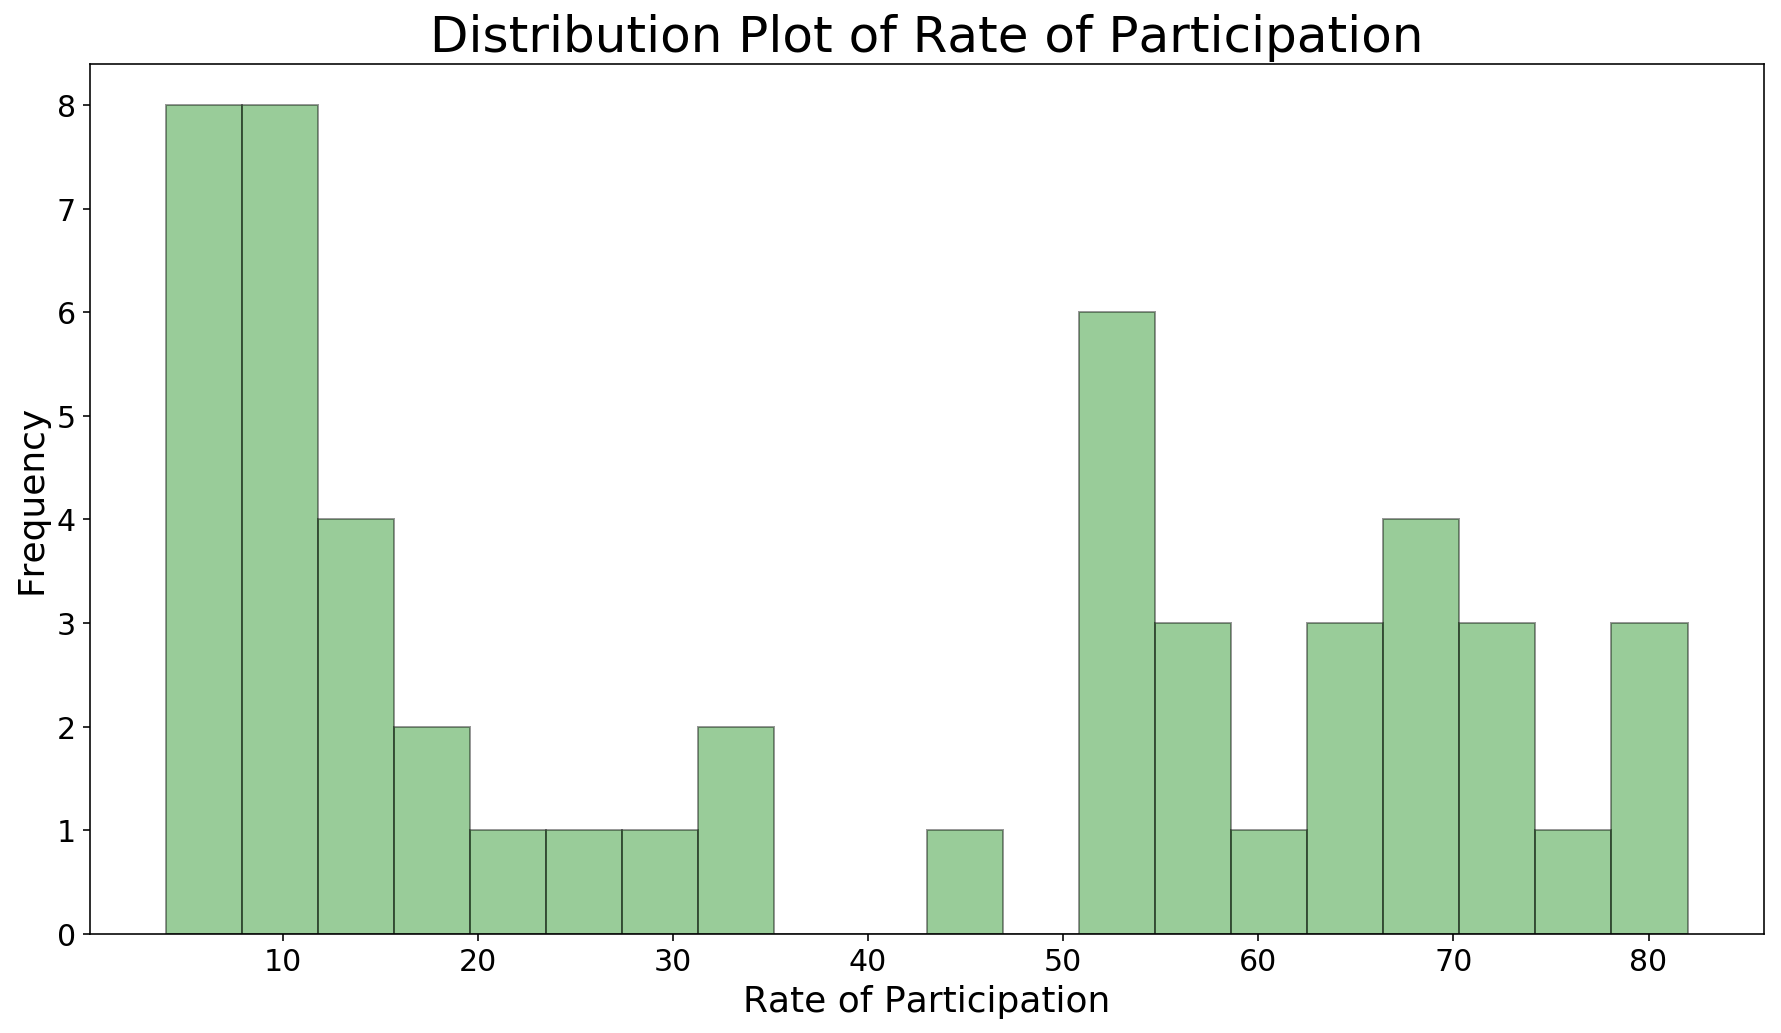

In [10]:
plt.figure(figsize=(15,8))

rc={'axes.labelsize': 15, 'font.size': 15, 'legend.fontsize': 15.0, 'axes.titlesize': 15}#set general font size for all subsequent plot
plt.rcParams.update(**rc) #update new setting into rcParams

rate_dist=sns.distplot(sat_scores_1.Rate, color='G', kde=False, bins=20, hist_kws=dict(edgecolor="black", linewidth=1))
rate_dist.set_xlabel('Rate of Participation',fontsize=18)
rate_dist.set_ylabel('Frequency',fontsize=18)
rate_dist.set_title('Distribution Plot of Rate of Participation',fontsize=25)

Text(0.5,1,'Distribution Plot of Average Verbal Score per State')

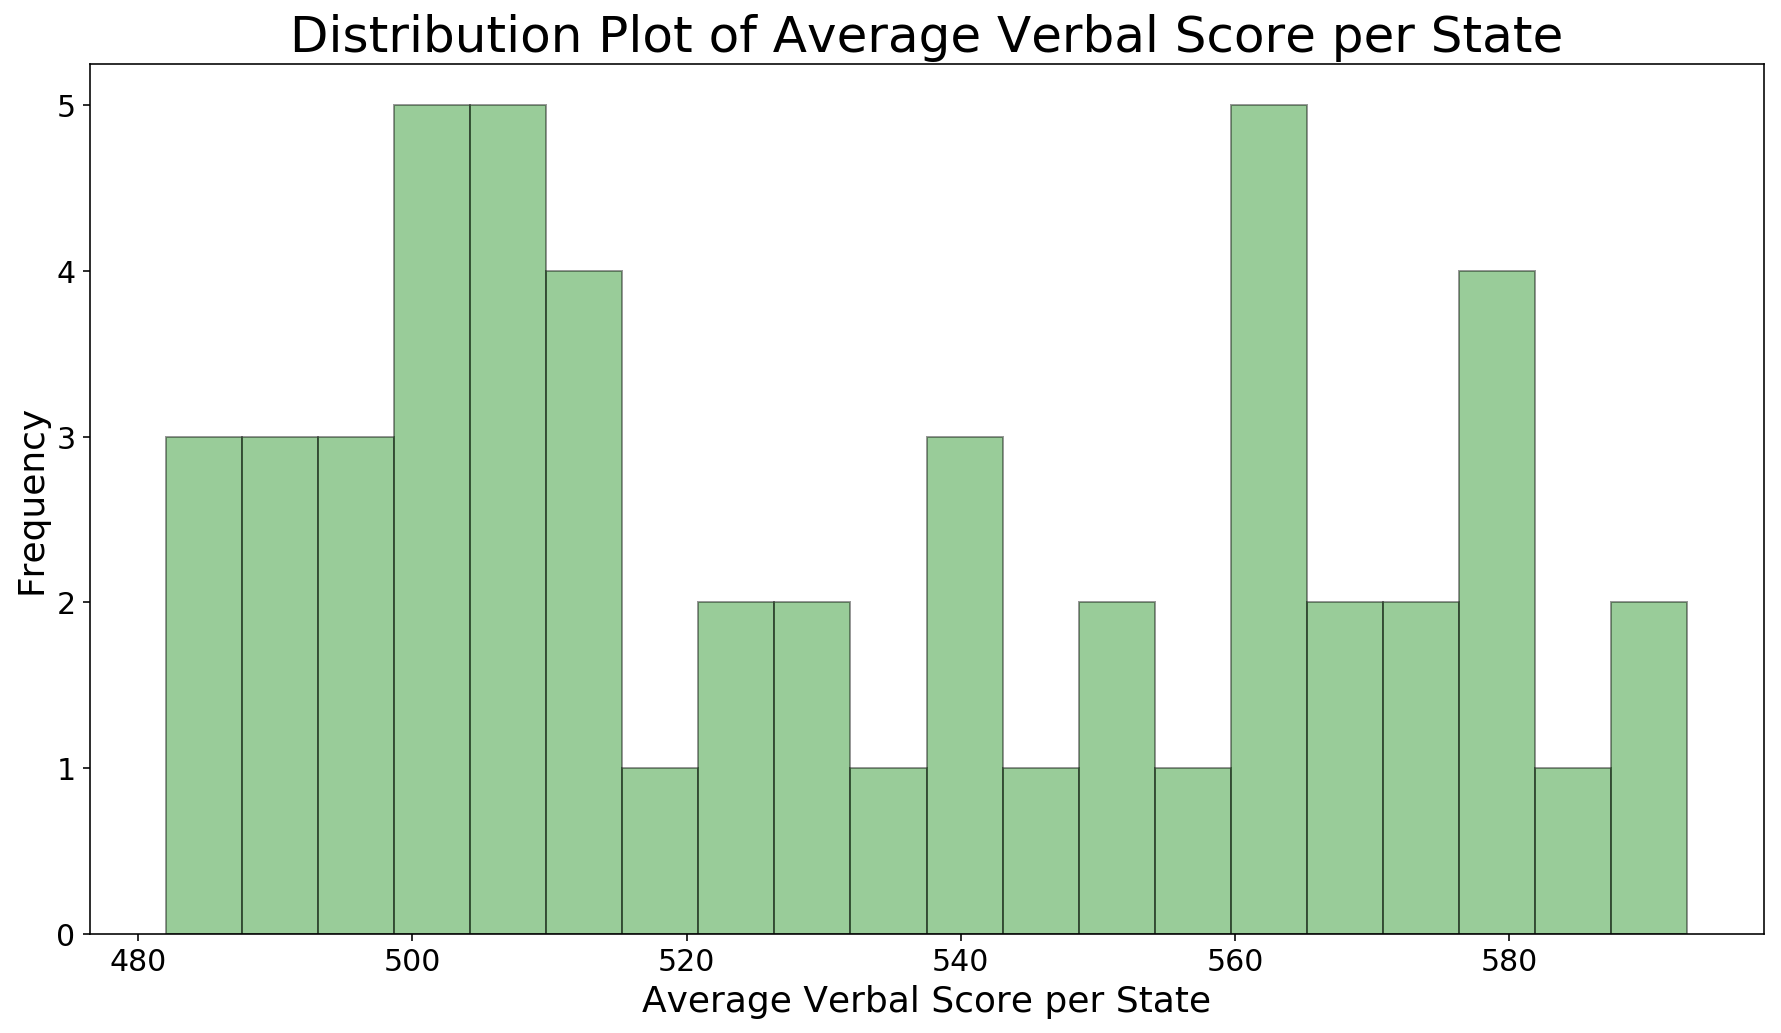

In [11]:
plt.figure(figsize=(15,8))
rate_dist=sns.distplot(sat_scores_1.Verbal, color='G', kde=False, bins=20, hist_kws=dict(edgecolor="black", linewidth=1))
rate_dist.set_xlabel('Average Verbal Score per State',fontsize=18)
rate_dist.set_ylabel('Frequency',fontsize=18)
rate_dist.set_title('Distribution Plot of Average Verbal Score per State',fontsize=25)

Text(0.5,1,'Distribution Plot of Average Math Score per State')

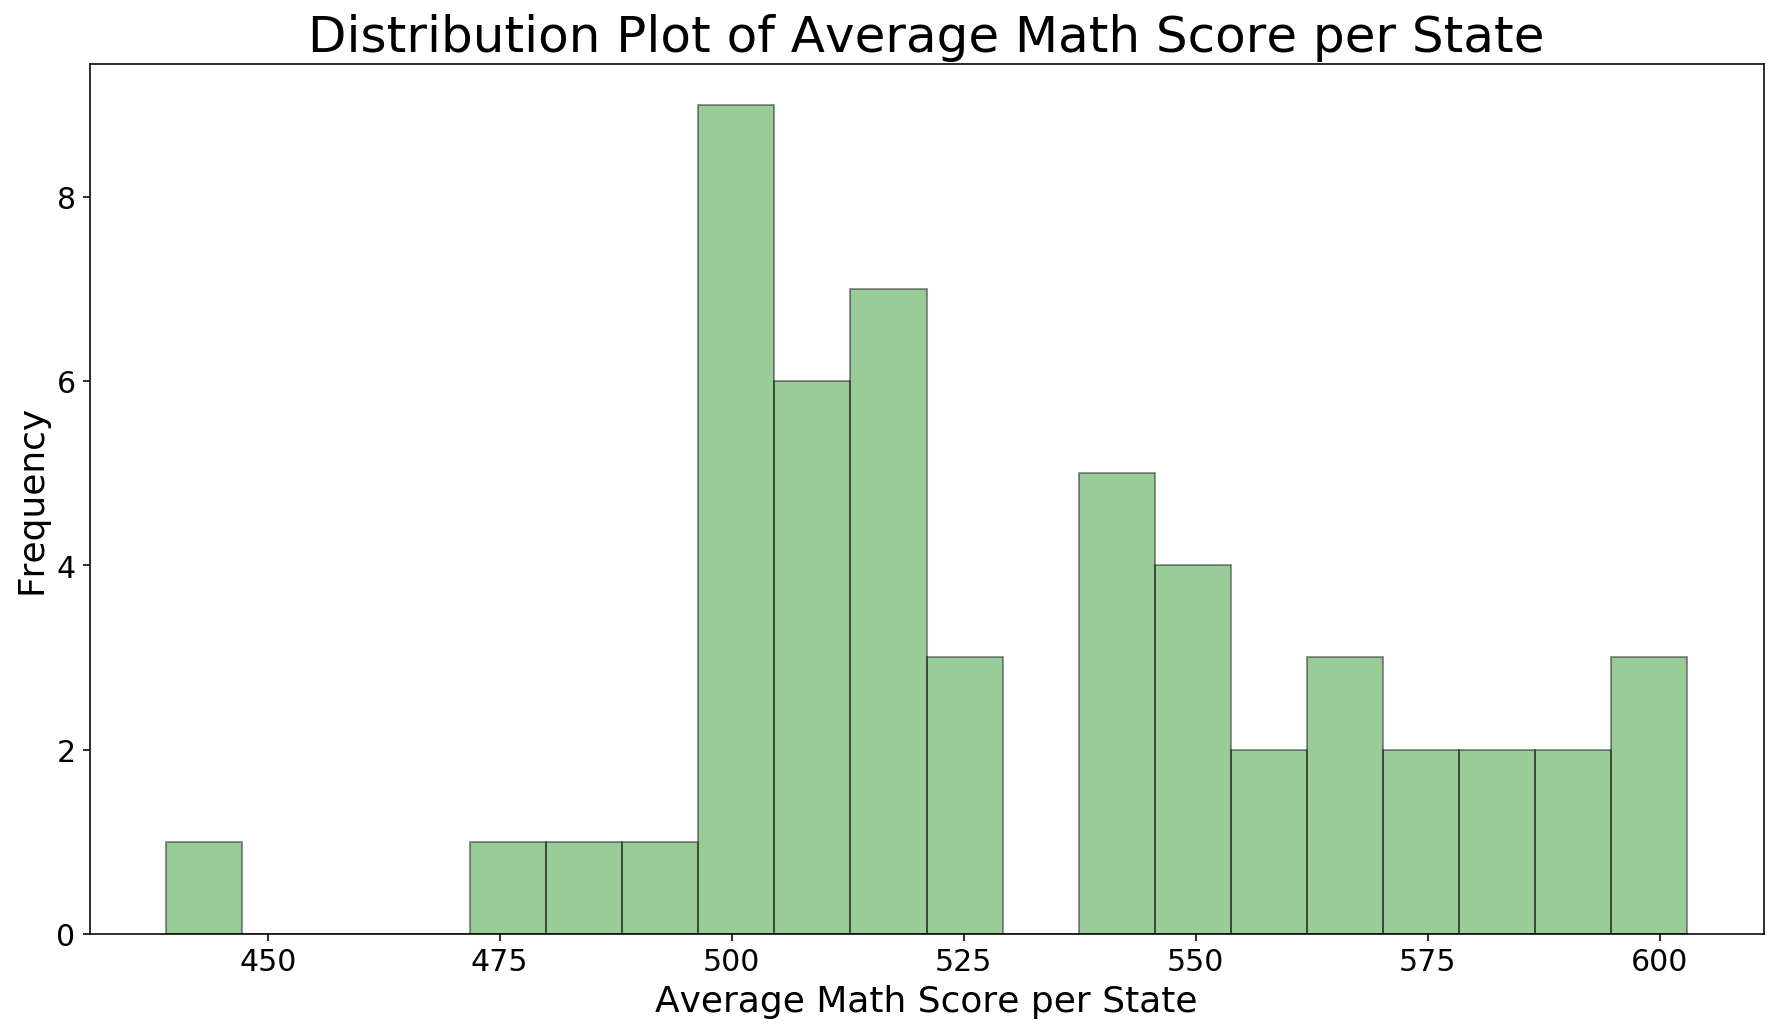

In [12]:
plt.figure(figsize=(15,8))
rate_dist=sns.distplot(sat_scores_1.Math, color='G', kde=False, bins=20, hist_kws=dict(edgecolor="black", linewidth=1))
rate_dist.set_xlabel('Average Math Score per State',fontsize=18)
rate_dist.set_ylabel('Frequency',fontsize=18)
rate_dist.set_title('Distribution Plot of Average Math Score per State',fontsize=25)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

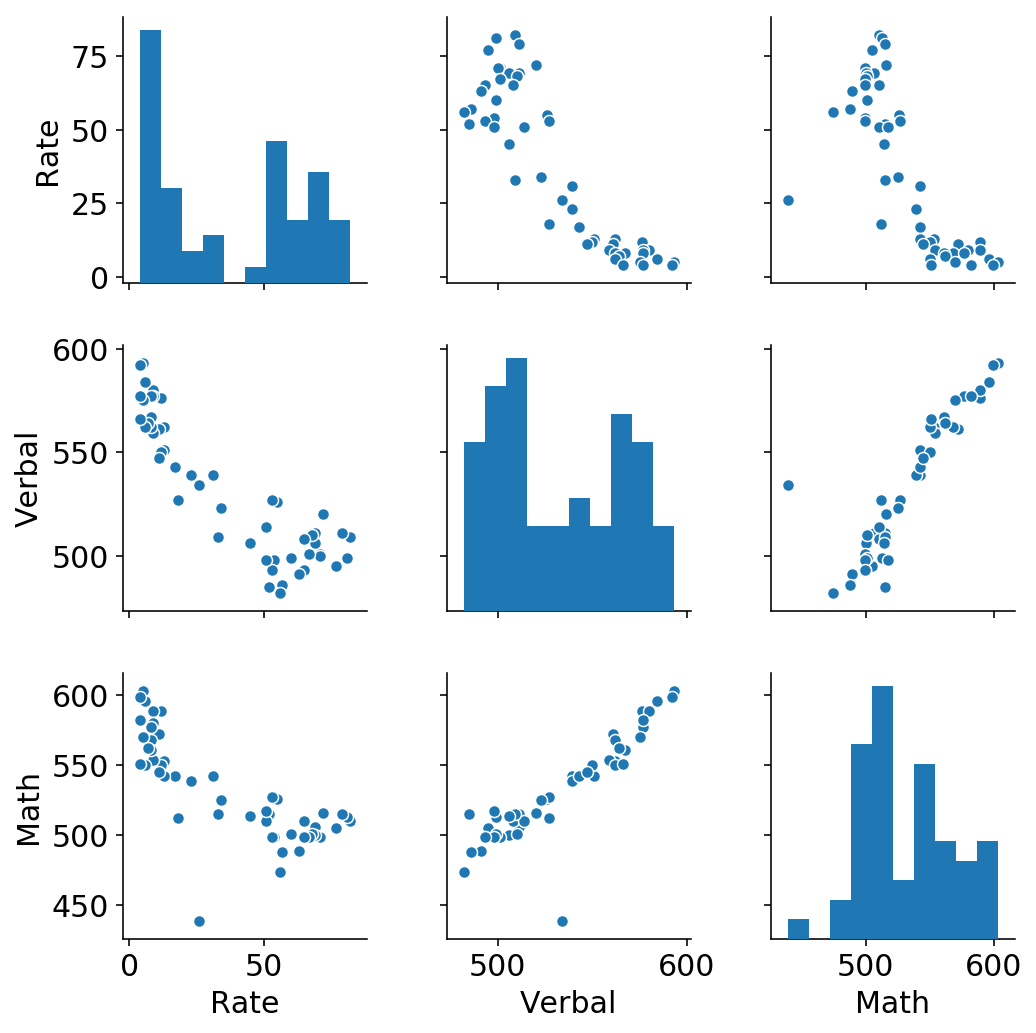

In [13]:
# import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(sat_scores_1)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5,1,'Stacked Distribution Plot of Verbal and Math Score')

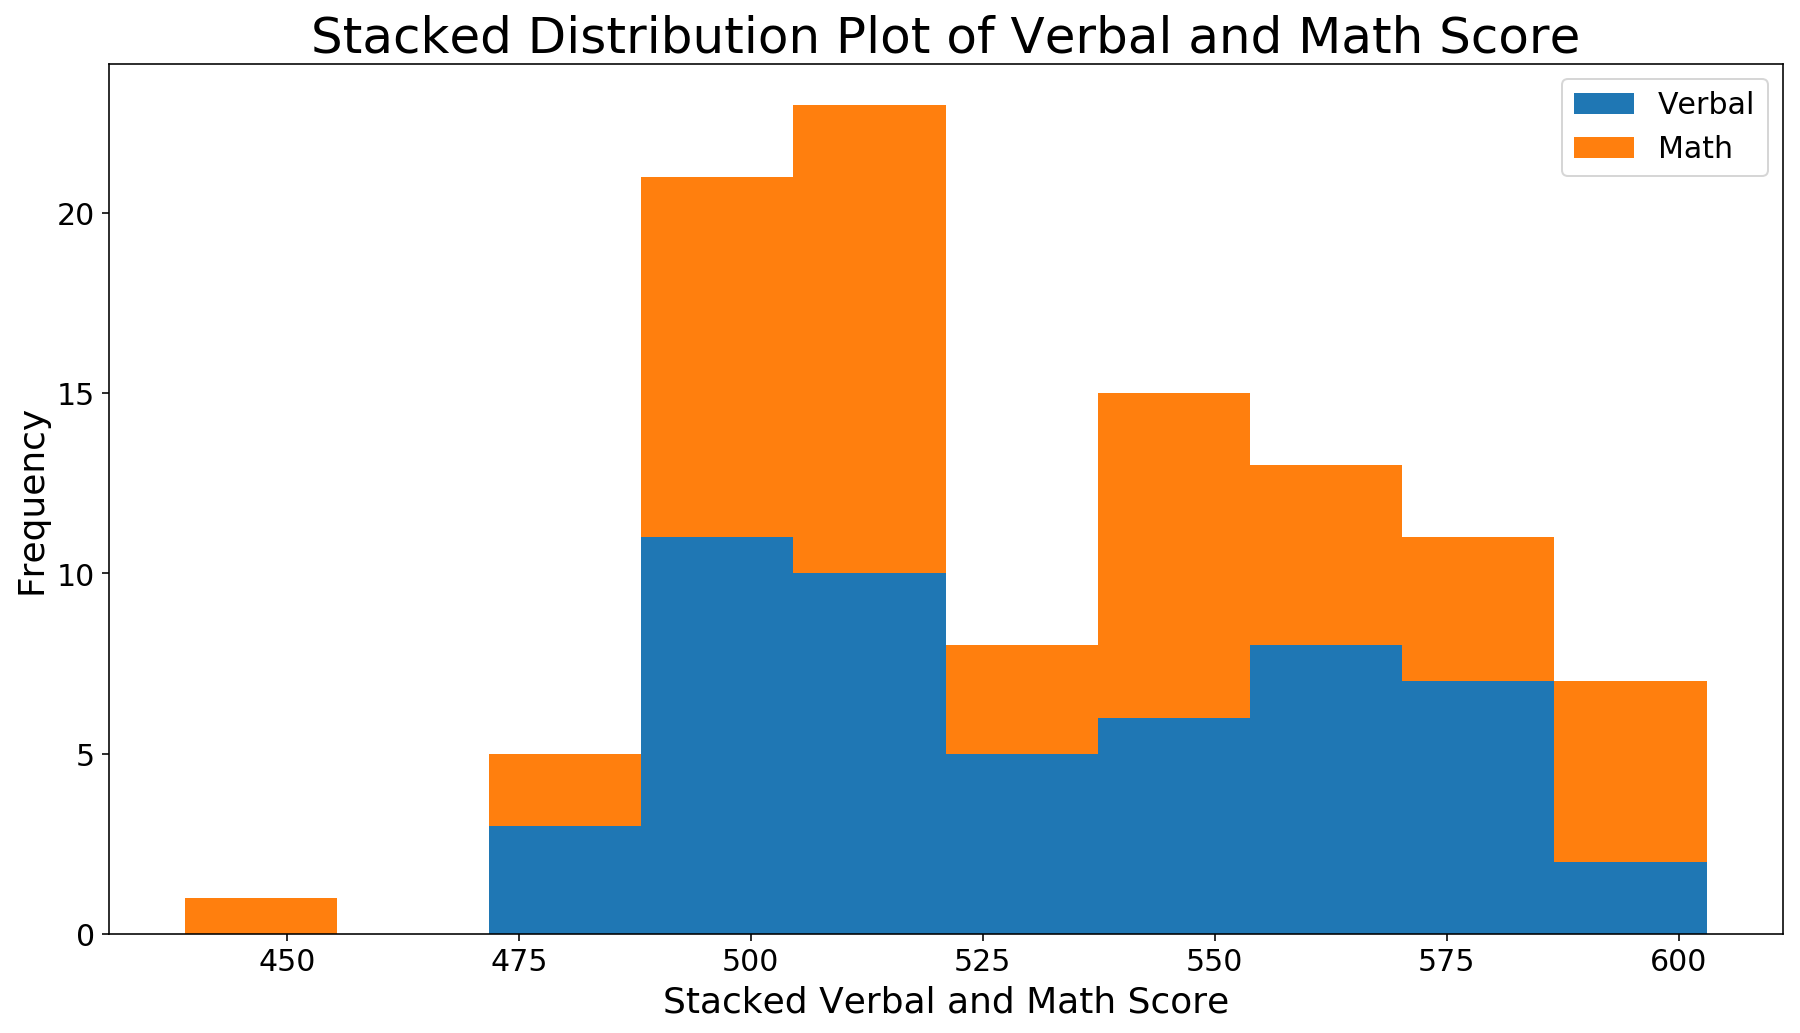

In [14]:
stack_hist = sat_scores_1[['Verbal', 'Math']].plot.hist(stacked=True,figsize=(15,8),fontsize=15)
stack_hist.set_xlabel('Stacked Verbal and Math Score',fontsize=18)
stack_hist.set_ylabel('Frequency',fontsize=18)
stack_hist.set_title('Stacked Distribution Plot of Verbal and Math Score',fontsize=25)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

It can be use to compare with ease the median, interquartile range, maximum and minimum between the 2 plot of math and verbal and easily identify any outliers in the data
<img src="https://slack-imgs.com/?c=1&url=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1200%2F1*2c21SkzJMf3frPXPAR_gZA.png" style="float: left; margin: 1px; height: 60">

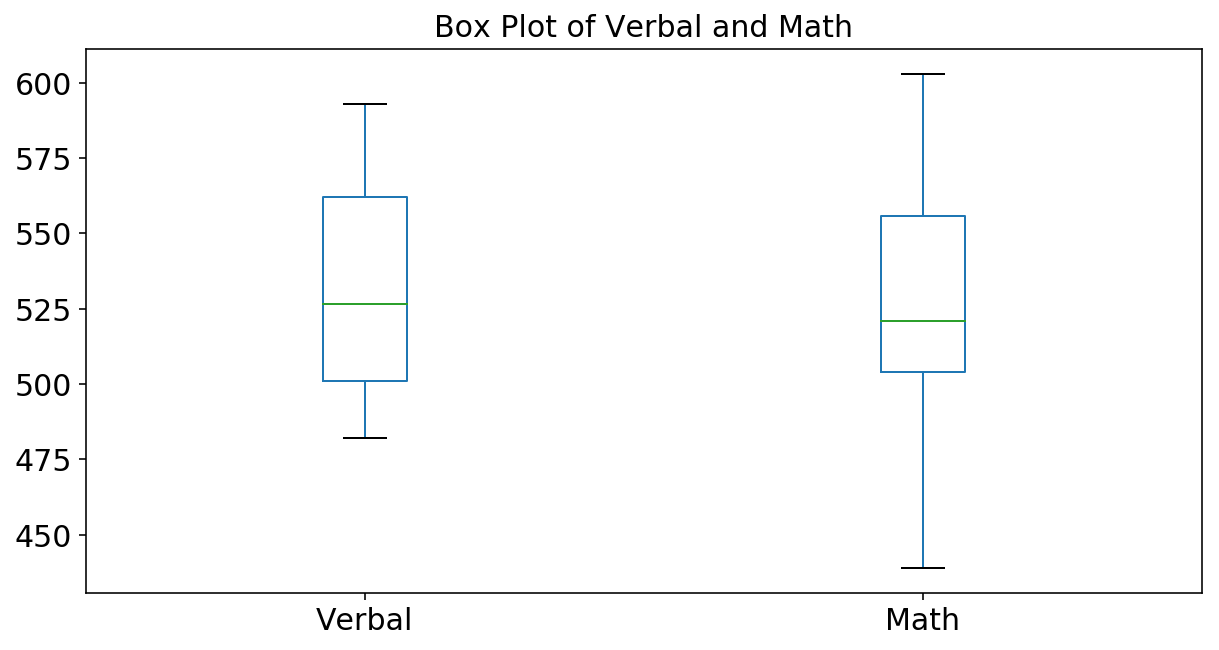

In [15]:
sat_scores_1[['Verbal', 'Math']].plot.box(figsize=(10,5),fontsize=15,title='Box Plot of Verbal and Math')

# sat_scores_1.plot.box() <-- see all the boxplot of all the columns that contain only integers
# Rate is measuring something of the different scale than Math and Verbal

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [16]:
sat_scores_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


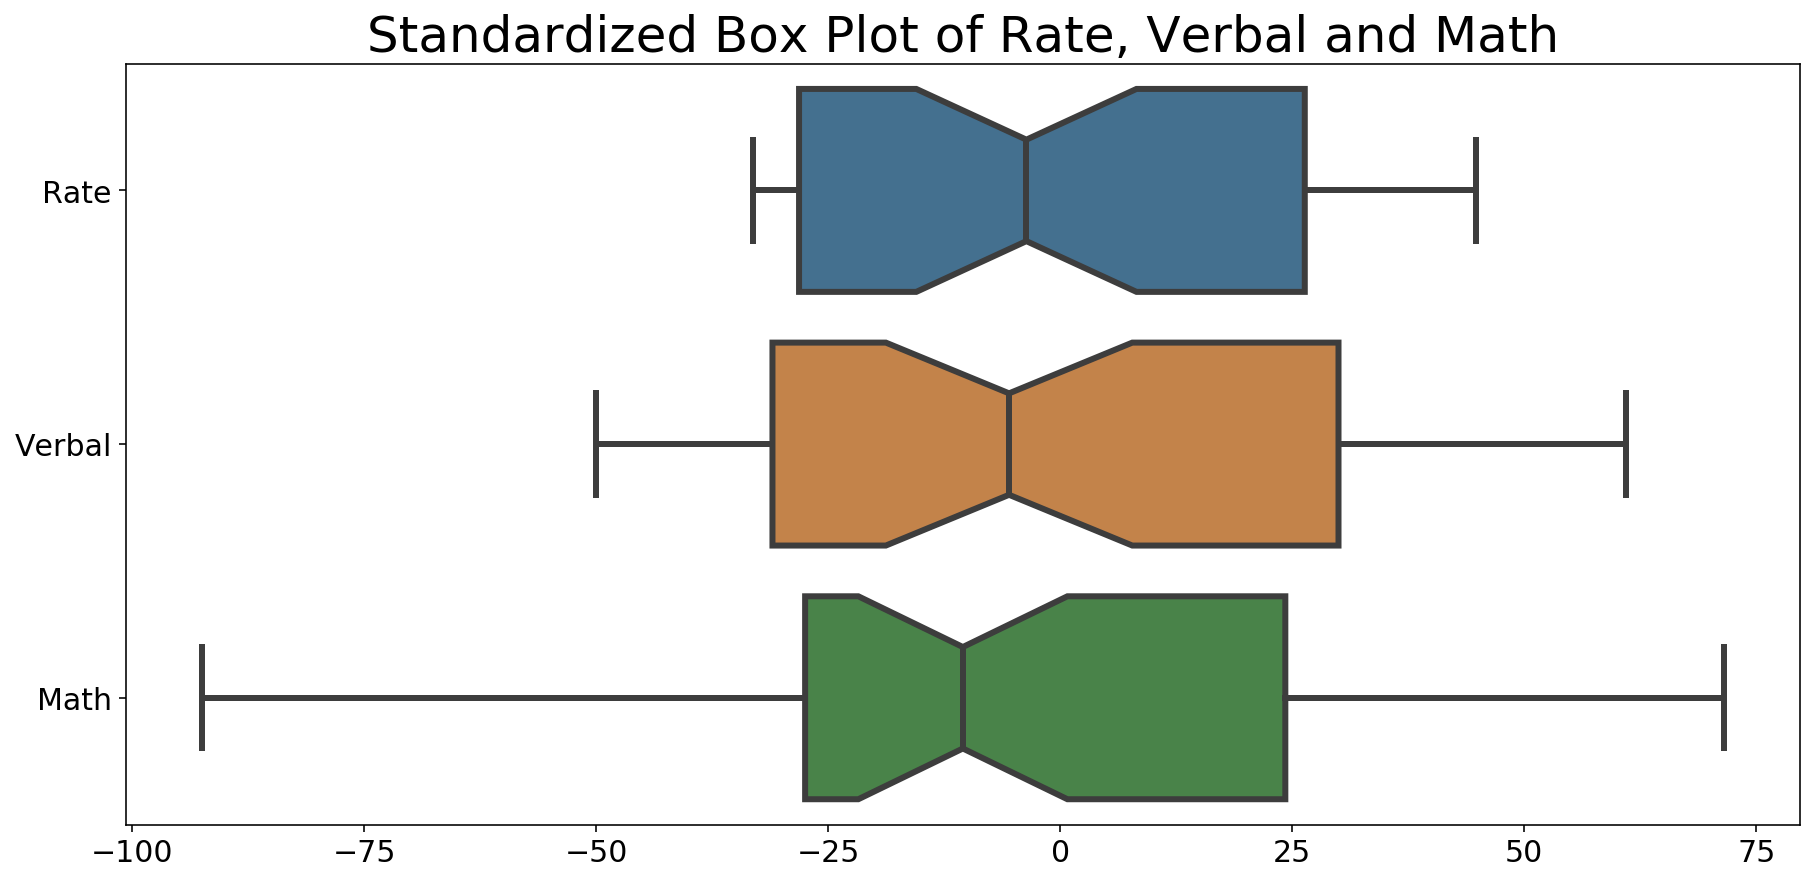

In [17]:
#equation to standadized
sat_scores_stand = (sat_scores_1[['Rate', 'Verbal', 'Math']] - sat_scores_1[['Rate', 'Verbal', 'Math']].mean())
/ sat_scores_1[['Rate','Verbal','Math']].std()

fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

ax = sns.boxplot(data=sat_scores_stand, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)

ax.set_title('Standardized Box Plot of Rate, Verbal and Math',fontsize=25)

plt.show()


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
sat_scores_1.tail() #to check where are the possible greater verbal scores

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [19]:
ave_verbal = np.mean(sat_scores_1.Verbal)
greater_ave_verbal = list(filter(lambda x: x > ave_verbal, sat_scores_1.Verbal))
print('Average Verbal Score: ',ave_verbal)
print('Scores greater than Average: ',greater_ave_verbal)

greater_ave_verbal_state = sat_scores_1.loc[sat_scores_1['Verbal']> ave_verbal] 
# print(greater_ave_verbal_state['State'])
greater_ave_verbal_state

Average Verbal Score:  532.0192307692307
Scores greater than Average:  [539, 534, 539, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566]


,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [20]:
med_verbal = np.median(sat_scores_1.Verbal)
greater_med_verbal = list(filter(lambda x: x > med_verbal, sat_scores_1.Verbal))
print('Median Verbal Score: ',med_verbal)
print('Scores greater than Median: ',greater_med_verbal)

greater_med_verbal_state = sat_scores_1.loc[sat_scores_1['Verbal']> med_verbal] 
print(greater_med_verbal_state['State'])

Median Verbal Score:  526.5
Scores greater than Median:  [527, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566]
19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
sat_scores_1.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [22]:
# diff_score = sat_scores_1.loc[np.abs(sat_scores_1['Verbal'] - sat_scores_1['Math'])] <----no fully working

sat_scores_1['Score Diff'] = sat_scores_1['Verbal'] - sat_scores_1['Math']
sat_scores_1.head()

,State,Rate,Verbal,Math,Score Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [23]:
# top 10 states with greatest gap between Verbal and Math scores where Verbal is greater than Math
sat_scores_VM = sat_scores_1.sort_values(by=['Score Diff'], ascending=False).iloc[0:10]
sat_scores_VM.head(3)

,State,Rate,Verbal,Math,Score Diff
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [24]:
# top 10 states with greatest gap between Verbal and Math such that Math is greater than Verbal
sat_scores_MV = sat_scores_1.sort_values(by=['Score Diff']).iloc[0:10]
sat_scores_MV['Score Diff'] = abs(sat_scores_MV['Score Diff'])
sat_scores_MV.head(3)

,State,Rate,Verbal,Math,Score Diff
21,HI,52,485,515,30
23,CA,51,498,517,19
1,NJ,81,499,513,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


,Rate,Verbal,Math,Score Diff
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Score Diff,-0.101412,0.052600,-0.388219,1.000000


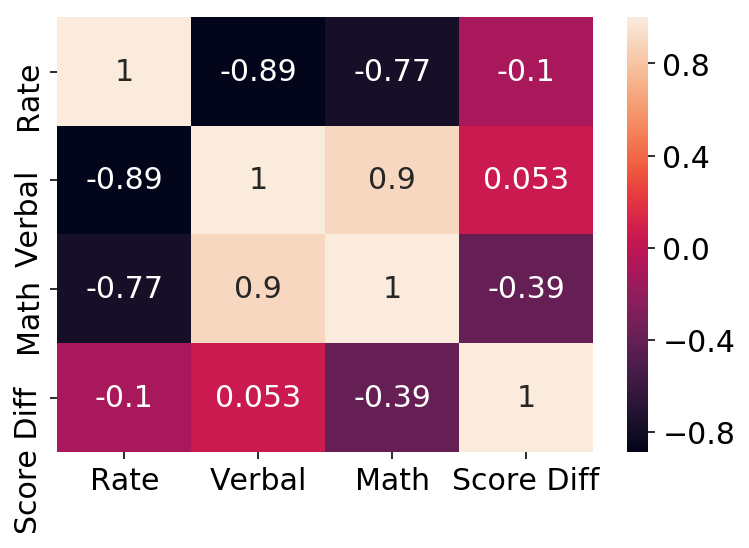

In [25]:
sat_scores_c = sat_scores_1.drop(columns="State")

ax = sns.heatmap(sat_scores_c.corr(), annot=True)
sat_scores_c.corr()

# https://www.surveysystem.com/correlation.htm
# The main result of a correlation is called the correlation coefficient (or "r").
# It ranges from -1.0 to +1.0. The closer r is to +1 or -1, the more closely the two variables are related.
# math and verbal scores are closely related
# Rate is closely related to to both math and verbal but at a slighly lesser degree.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [26]:
sat_scores_c.describe()

,Rate,Verbal,Math,Score Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [27]:
sat_scores_c.cov()
# 1.
# https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22
# correlation is a non-dimensional measure of strength and direction of the linear relationship between 2 variables
# covariance values are non-standardise and only indicates the direction of the linear relationship between variables
#2.
# https://blogs.sas.com/content/iml/2010/12/10/converting-between-correlation-and-covariance-matrices.html
#

,Rate,Verbal,Math,Score Diff
Rate,745.387632,-804.355958,-760.803922,-43.552036
Verbal,-804.355958,1104.646682,1077.147059,27.499623
Math,-760.803922,1077.147059,1297.078431,-219.931373
Score Diff,-43.552036,27.499623,-219.931373,247.430995


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [70]:
drug = pd.read_table('./drug-use-by-age.csv', sep=',')
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [74]:
drug.info()

# 17 non-null object vs 17 rows 
# even though no non-null value but there are blank or dash value.
# will compare between putting a zero and deleting the row to see if it will skew the result
# Need to convert columns of objects into float values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [75]:
drug.select_dtypes(exclude=['float64'])
# next convert all '-' to '0' and all object column into float column

,age,n,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,12,2798,5.0,-,35.5,19.0,24.5,-
1,13,2757,1.0,3.0,-,12.0,41.0,5.0
2,14,2792,5.5,-,2.0,5.0,4.5,24.0
3,15,2956,4.0,9.5,1.0,5.5,3.0,10.5
4,16,3058,7.0,1.0,66.5,3.0,4.0,36.0
5,17,3038,5.0,21.0,64.0,4.0,6.0,48.0
6,18,2469,5.0,10.0,46.0,4.0,7.0,12.0
7,19,2223,5.5,2.0,180.0,3.0,7.5,105.0
8,20,2271,8.0,5.0,45.0,4.0,12.0,12.0
9,21,2354,5.0,17.0,30.0,2.0,13.5,2.0


In [76]:
drug = drug.replace('-',np.NaN)
#convert all '-' to NaN
drug = drug.fillna(0)
#convert all NaN to 0
drug.select_dtypes(exclude=['float64'])

,age,n,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,12,2798,5.0,0,35.5,19.0,24.5,0
1,13,2757,1.0,3.0,0,12.0,41.0,5.0
2,14,2792,5.5,0,2.0,5.0,4.5,24.0
3,15,2956,4.0,9.5,1.0,5.5,3.0,10.5
4,16,3058,7.0,1.0,66.5,3.0,4.0,36.0
5,17,3038,5.0,21.0,64.0,4.0,6.0,48.0
6,18,2469,5.0,10.0,46.0,4.0,7.0,12.0
7,19,2223,5.5,2.0,180.0,3.0,7.5,105.0
8,20,2271,8.0,5.0,45.0,4.0,12.0,12.0
9,21,2354,5.0,17.0,30.0,2.0,13.5,2.0


In [77]:
obj_column = ["cocaine-frequency", "crack-frequency", "heroin-frequency", "inhalant-frequency", "oxycontin-frequency", "meth-frequency"]
#convert all object column to float column
drug[obj_column] = drug[obj_column].apply(pd.to_numeric)

drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [78]:
drug_freq = []
for item in drug.columns:
    if 'frequency' in item:
        drug_freq.append(item)

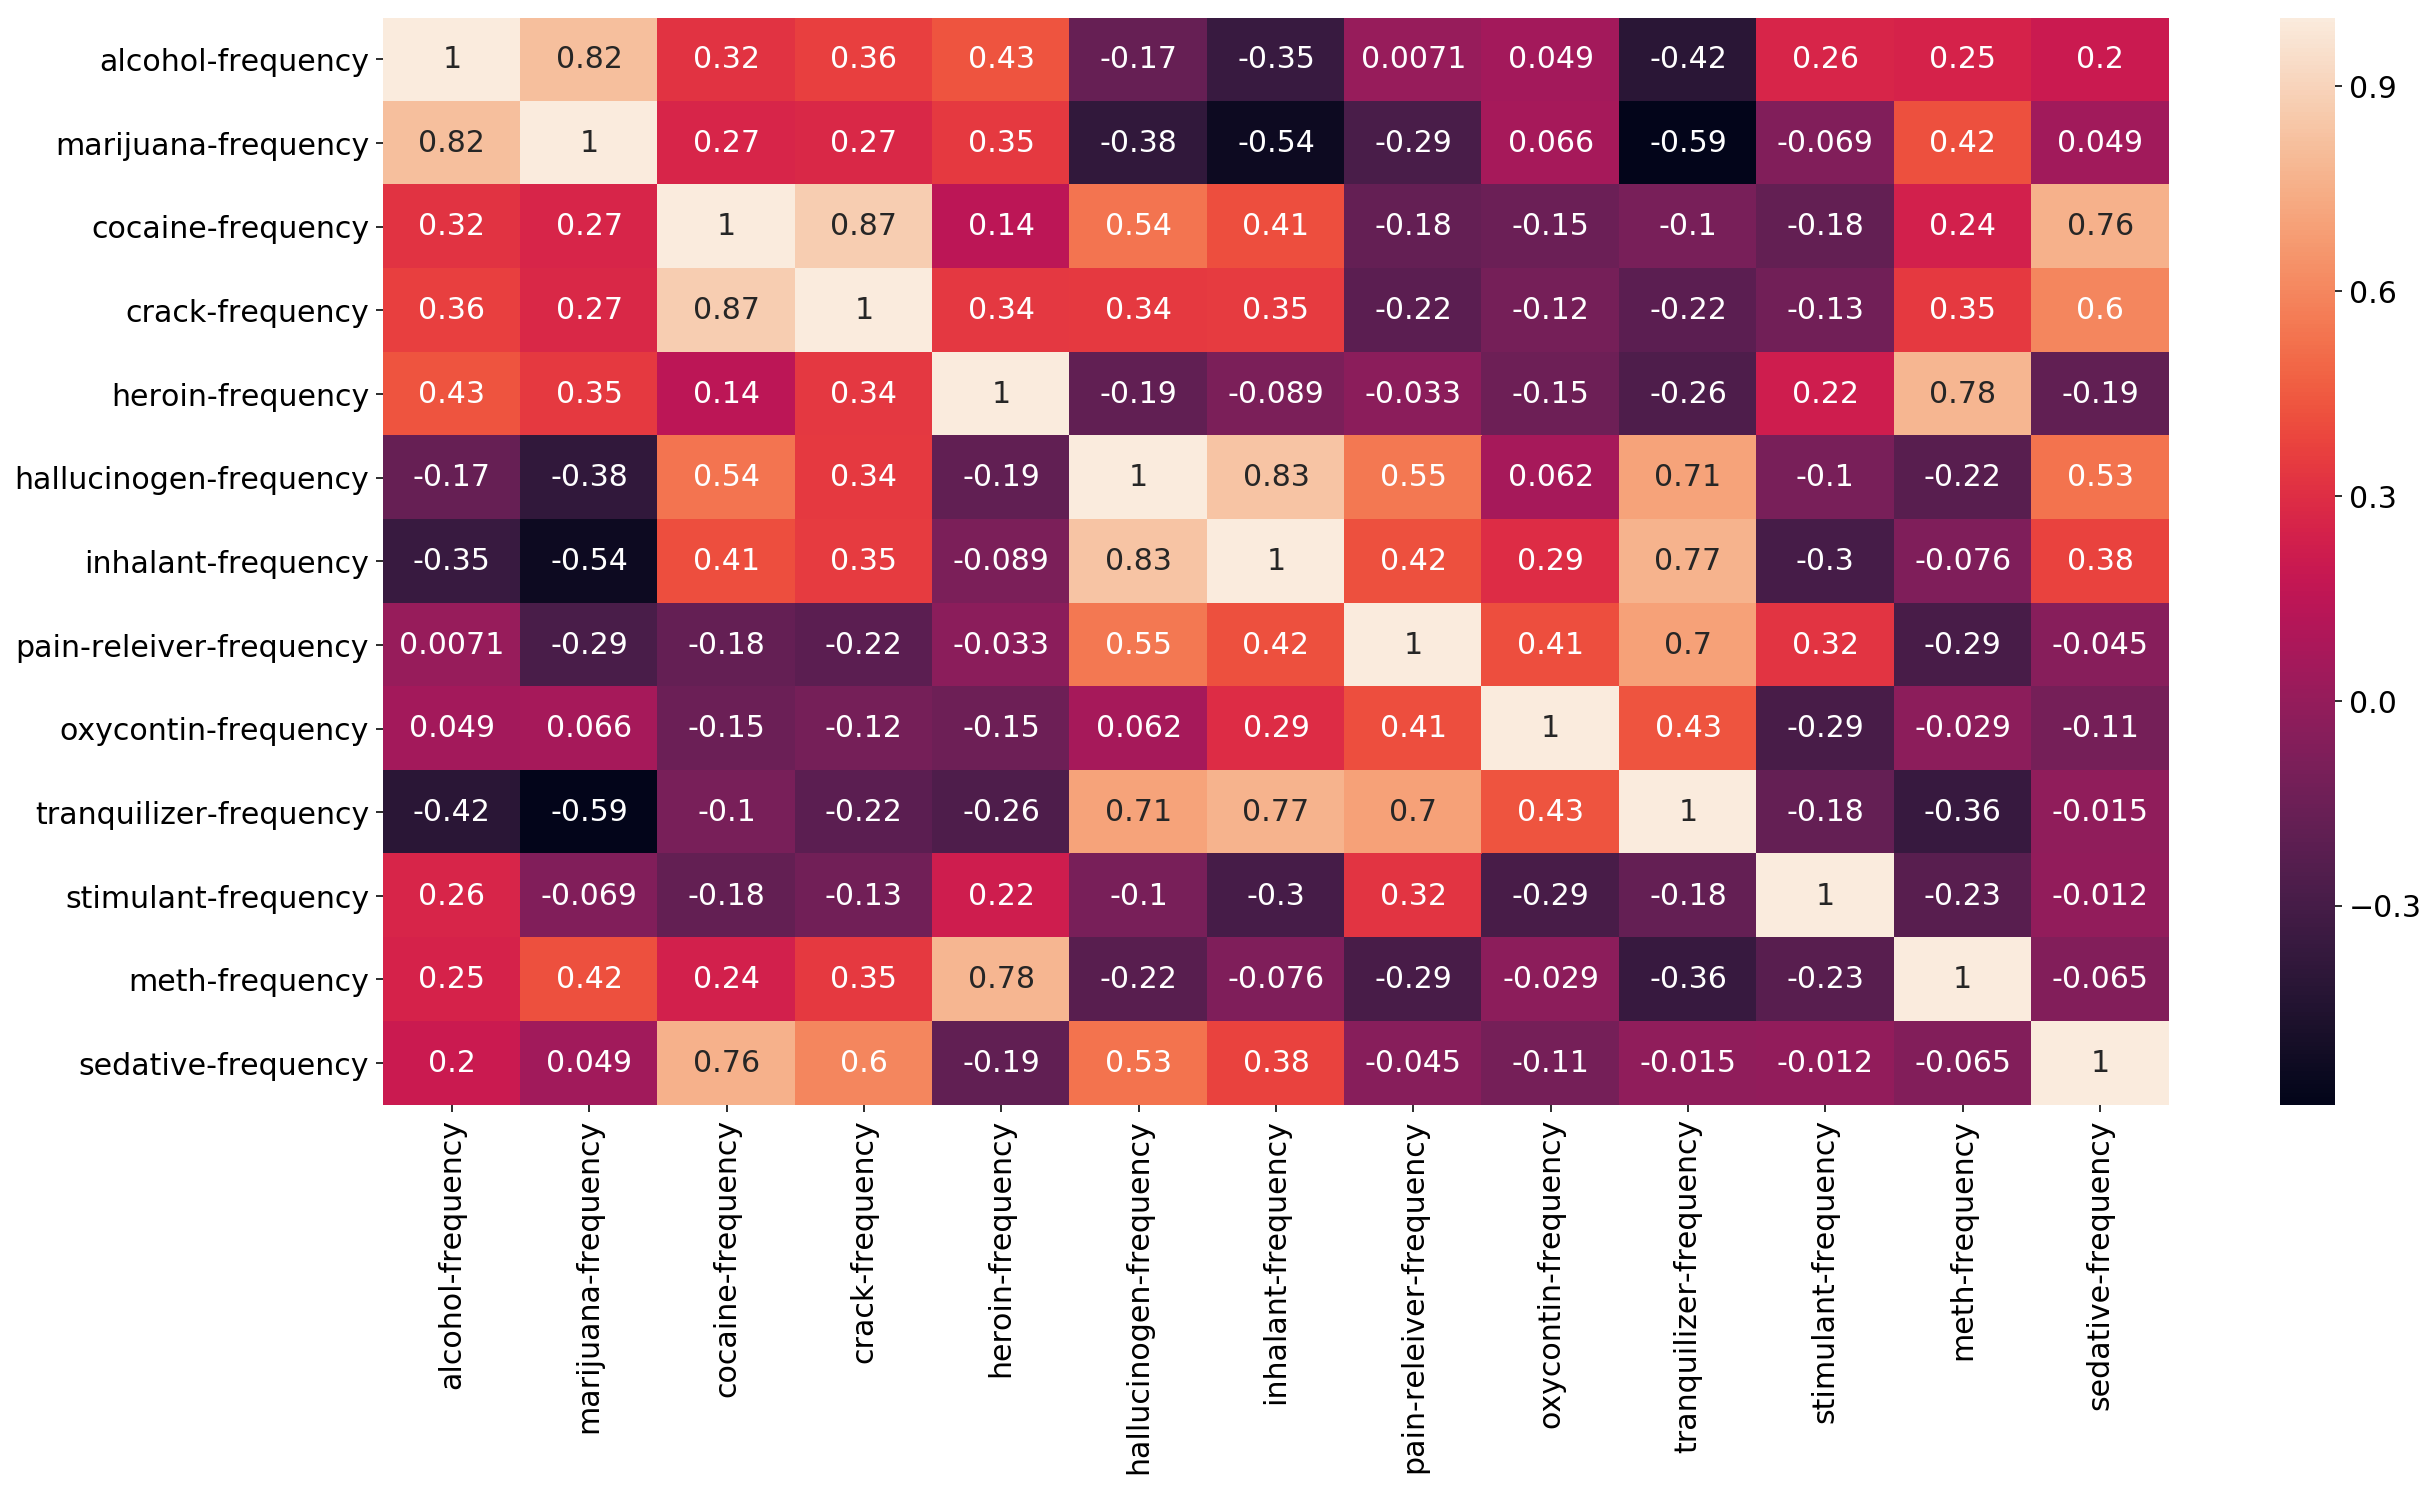

In [79]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(drug[drug_freq].corr(), annot=True)

# frequency is the median of a group of user who use a substance and it shows a strong positive correlation between
# alcohol-marijuana, crack-cocaine, inhalant-hallucinogen and several others. This may indicate the availability of
# the substances may be linked or the usage of a combination of substances may lead to a better user desire effect.
# Further investigation needed if it is the same person happens to be the median of the age group so that the earlier
# assumption may be checked.

In [80]:
drug_use = []
for item in drug.columns:
    if 'use' in item:
        drug_use.append(item)

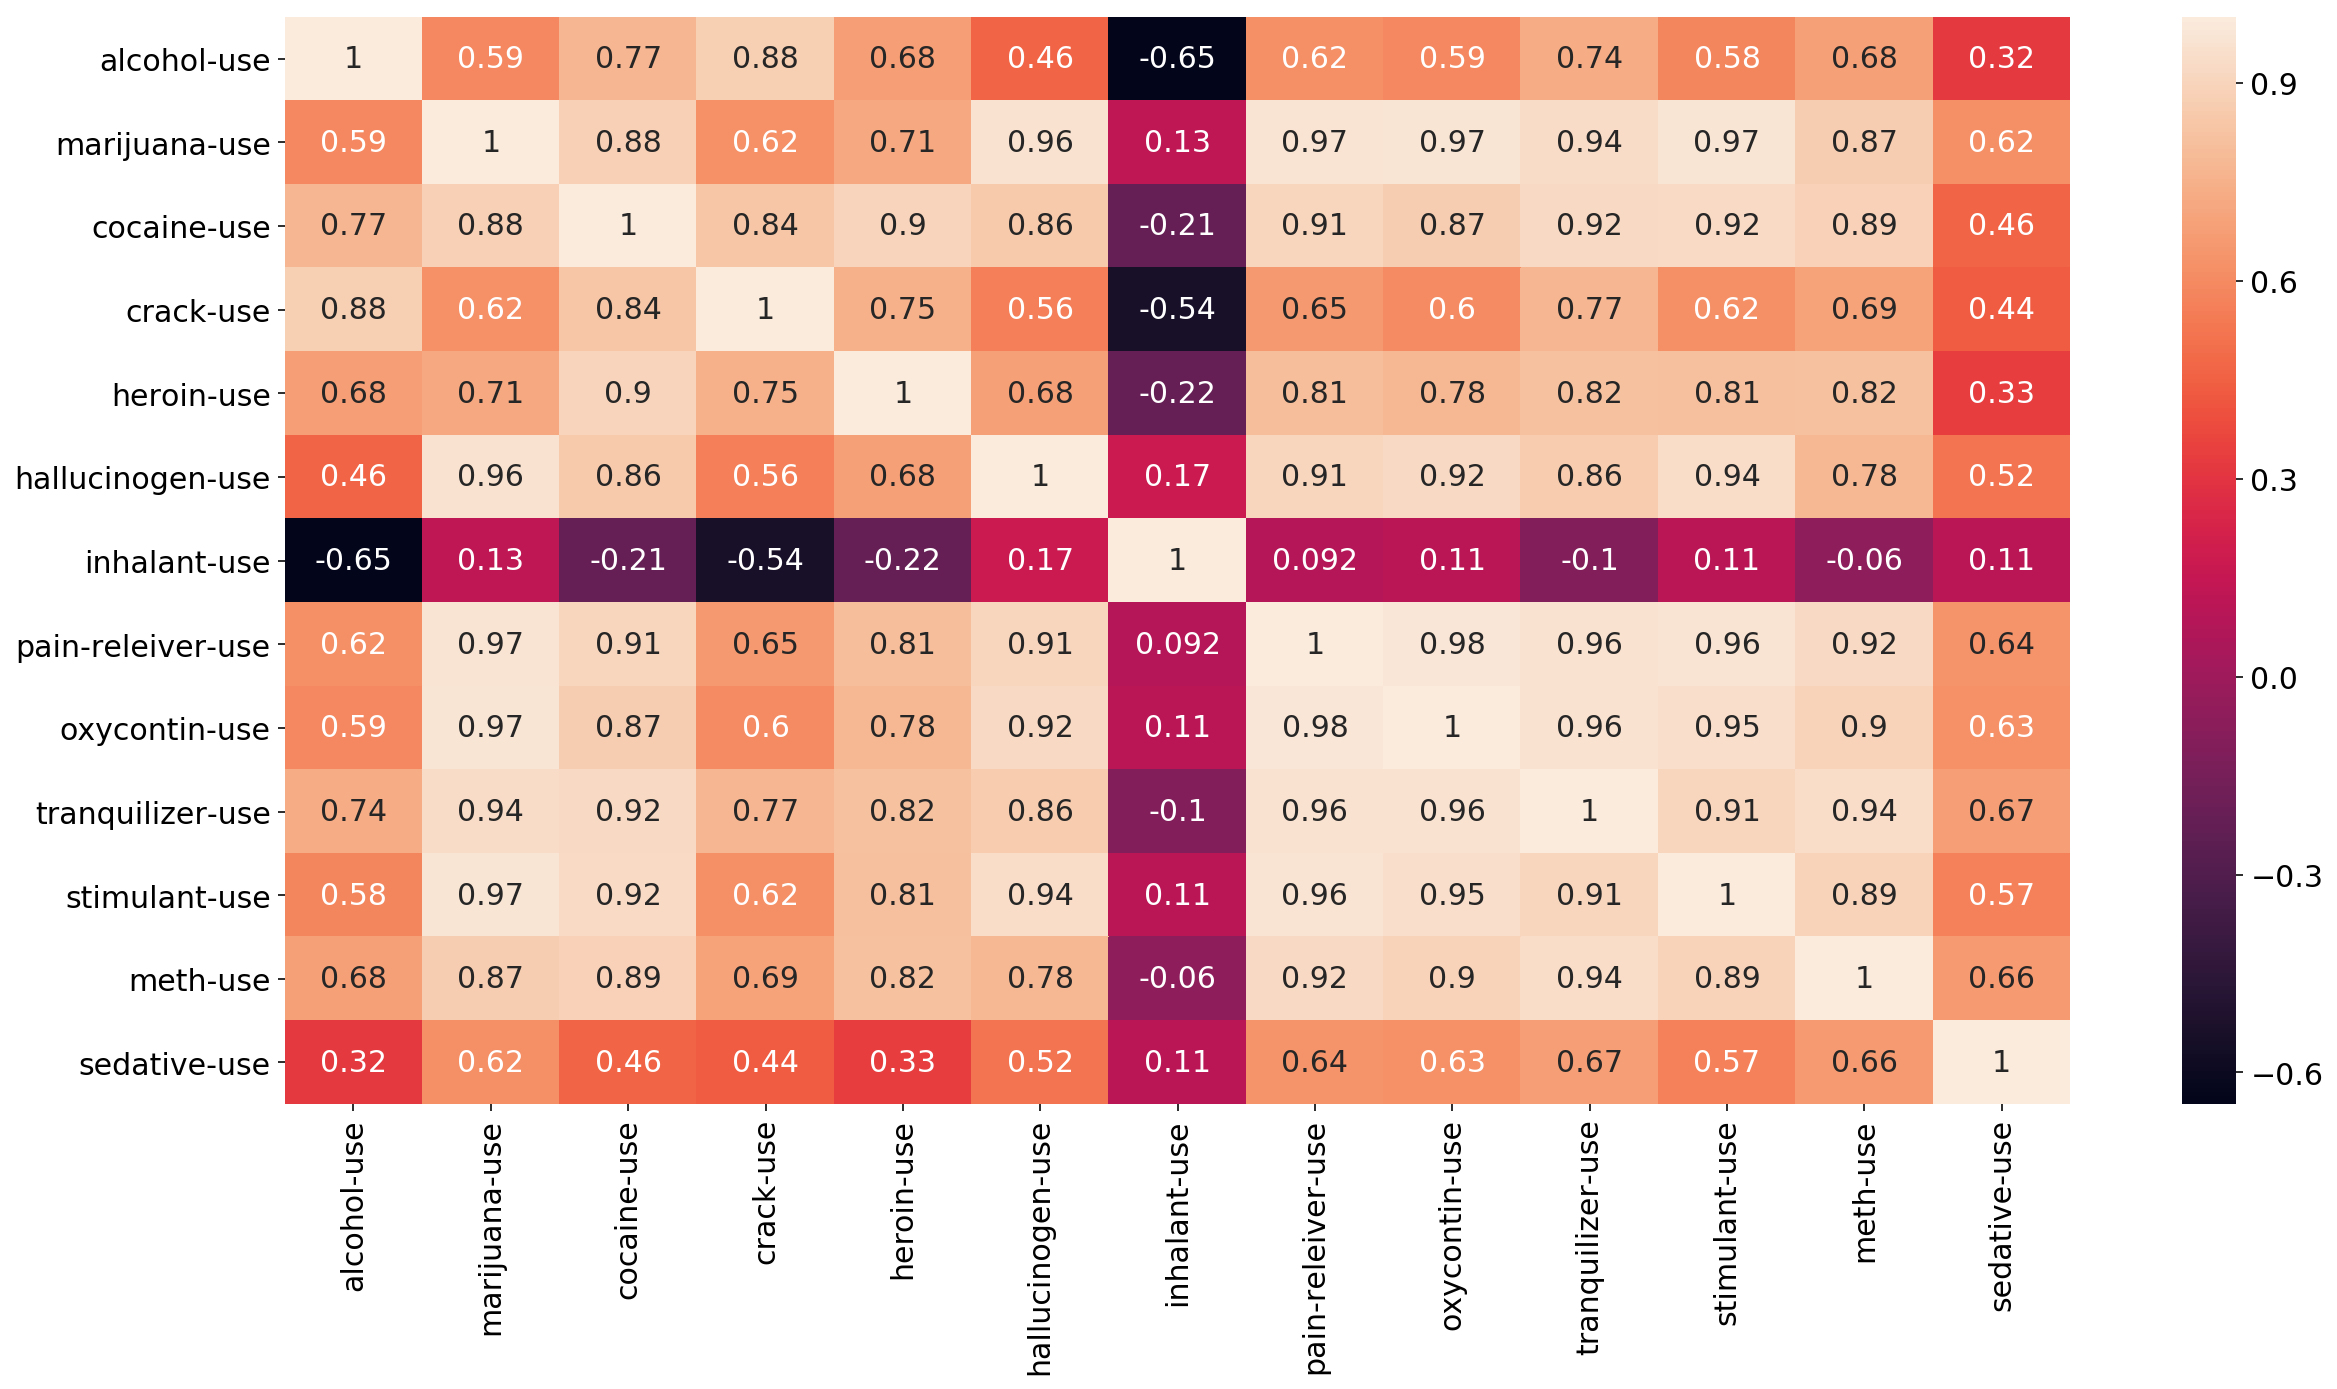

In [81]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(drug[drug_use].corr(), annot=True)

# This is the heatmap of percentage of the group who have use the substance in the last 12 months.
# It shows a very different correlation of the substances use when compare with heatmap of median user.
# Generally, it show a much stronger correlation of various different substance users except inhalant users that show the least.
# Marijuana user shows a strong correlation with most other substance users.
# This heatmap also shows a very strong correlation of the substances in the lower right quadrant of the heatmap.
# Further investigation into user of these substances may yield further insights for the reasons.

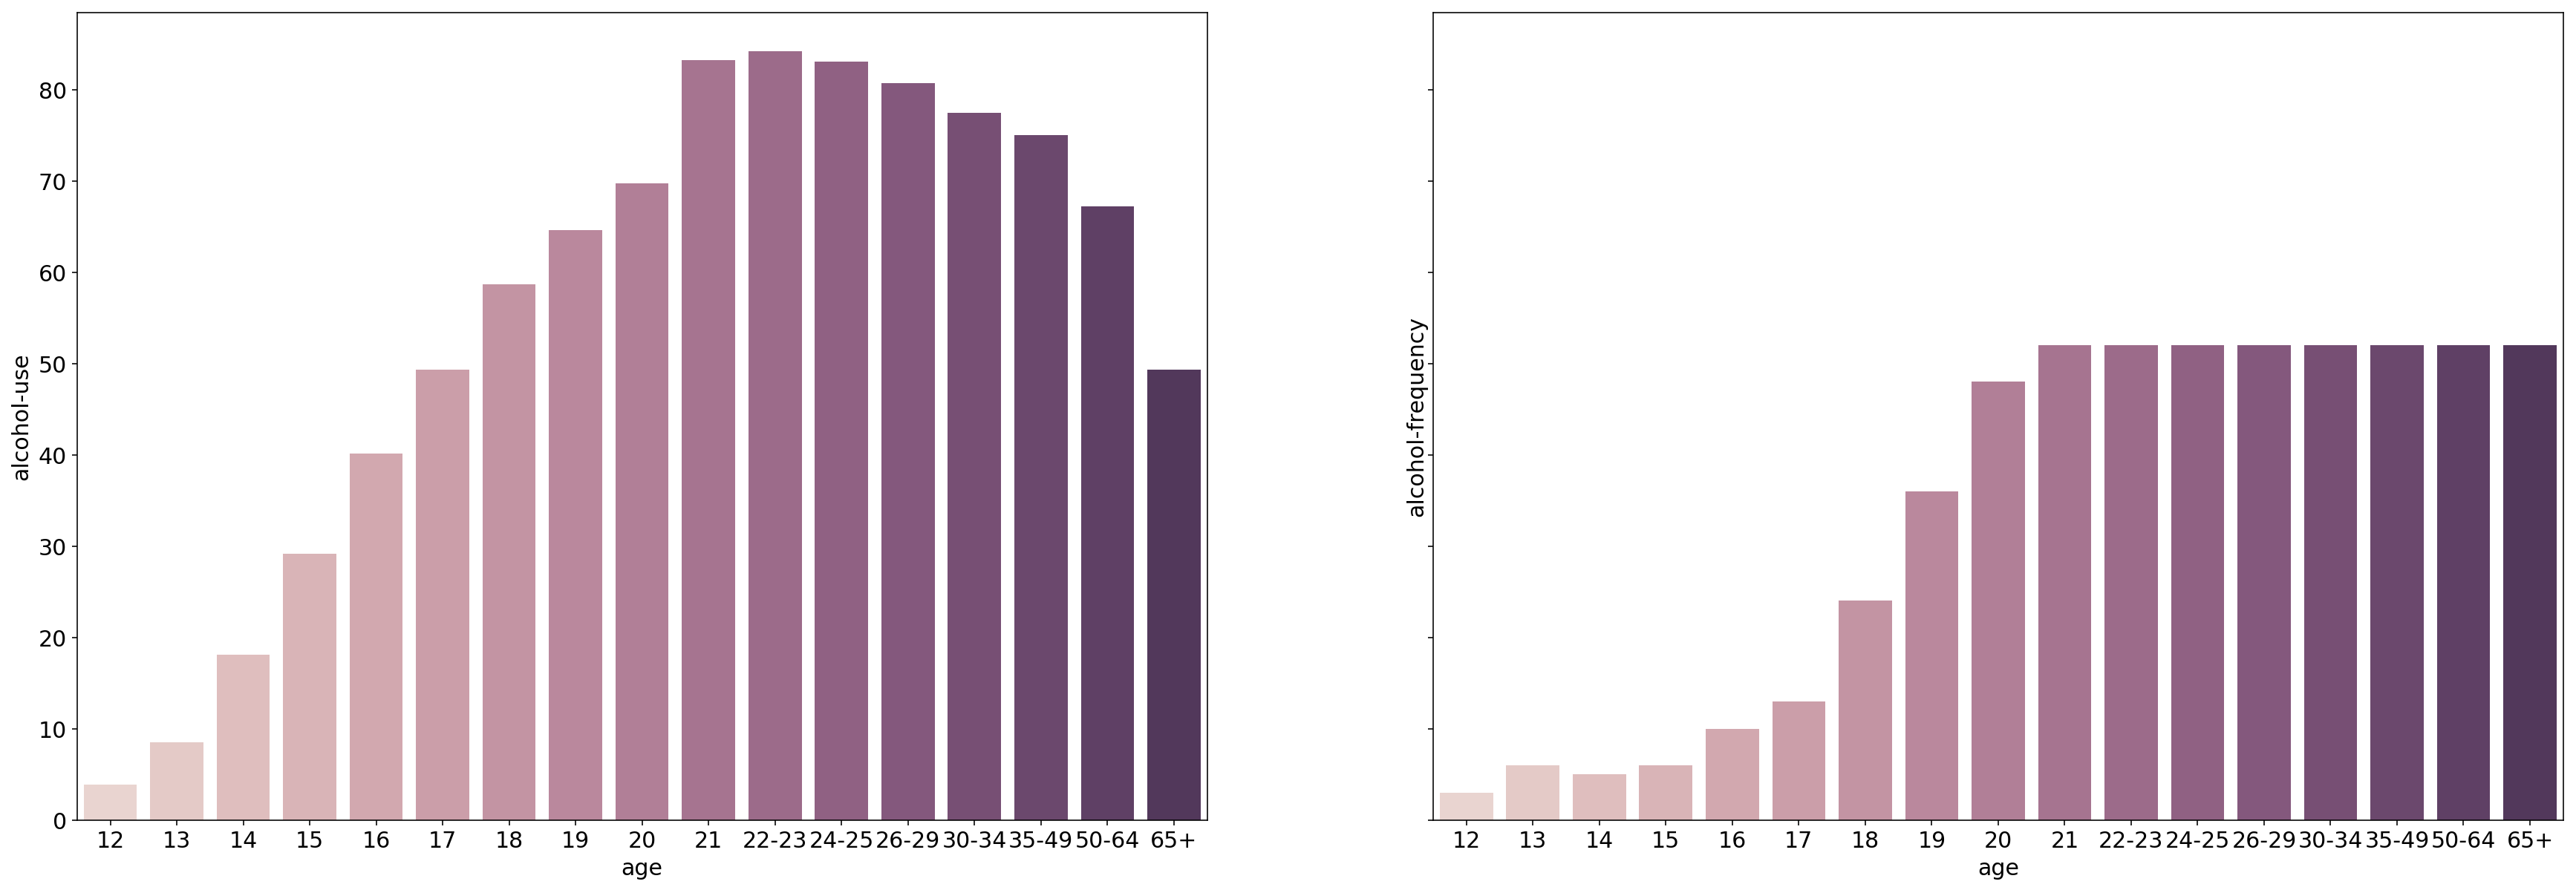

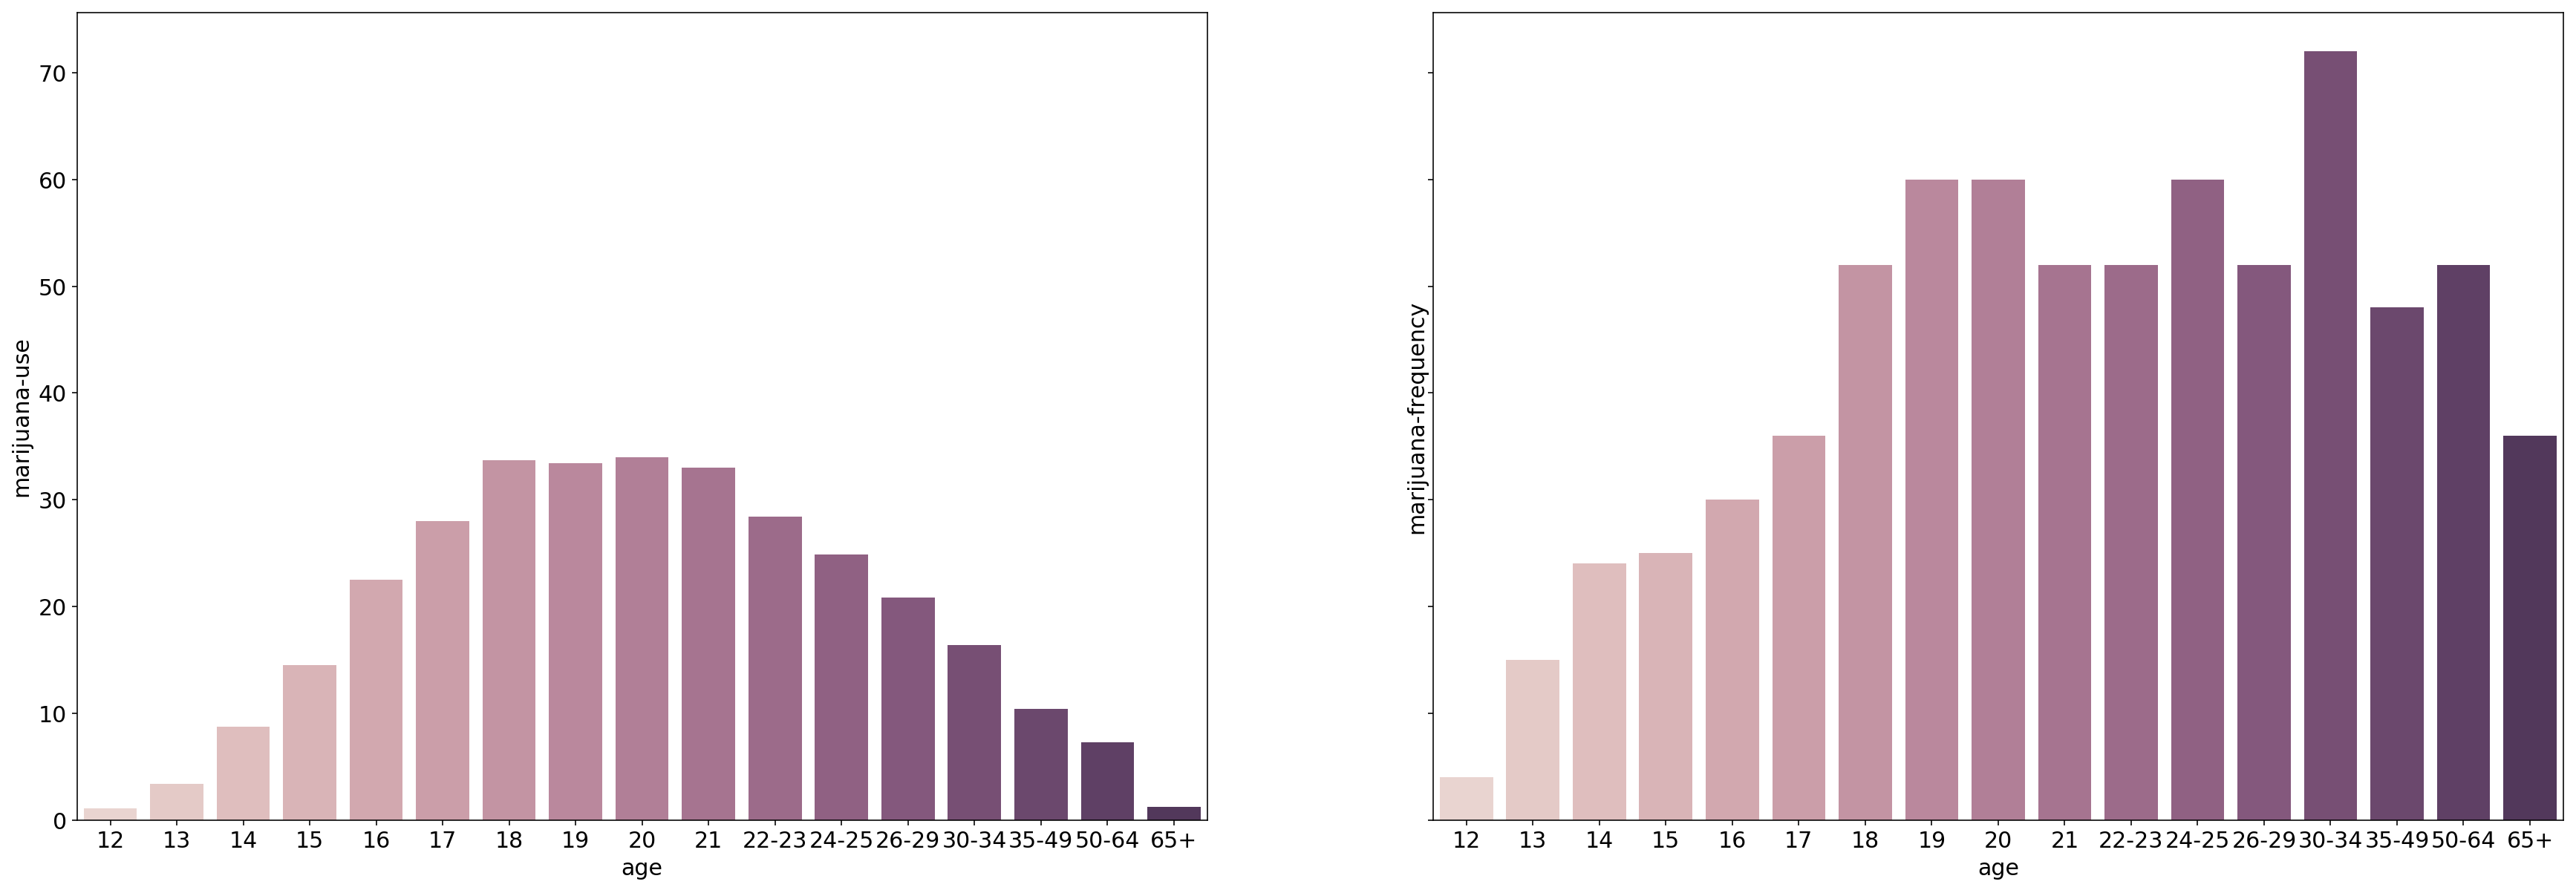

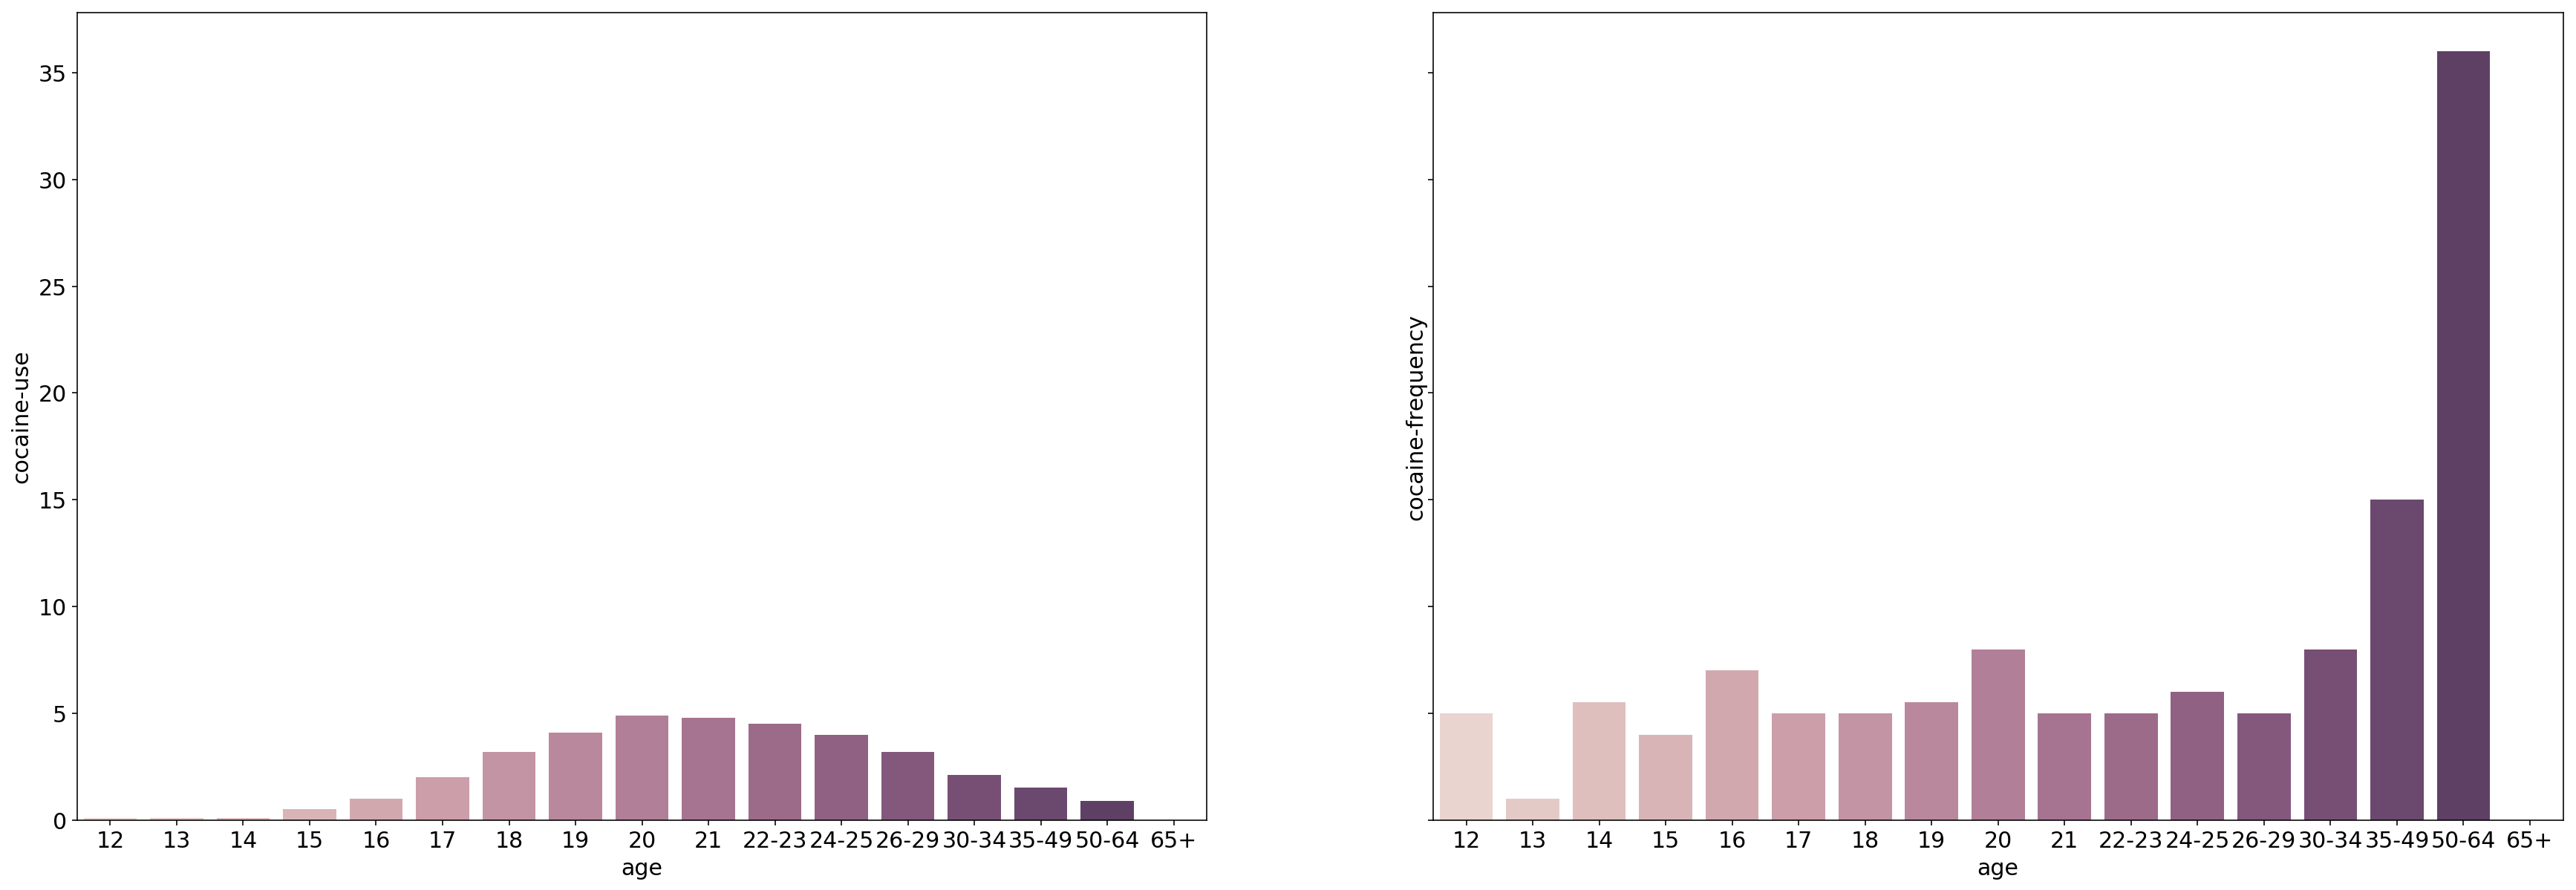

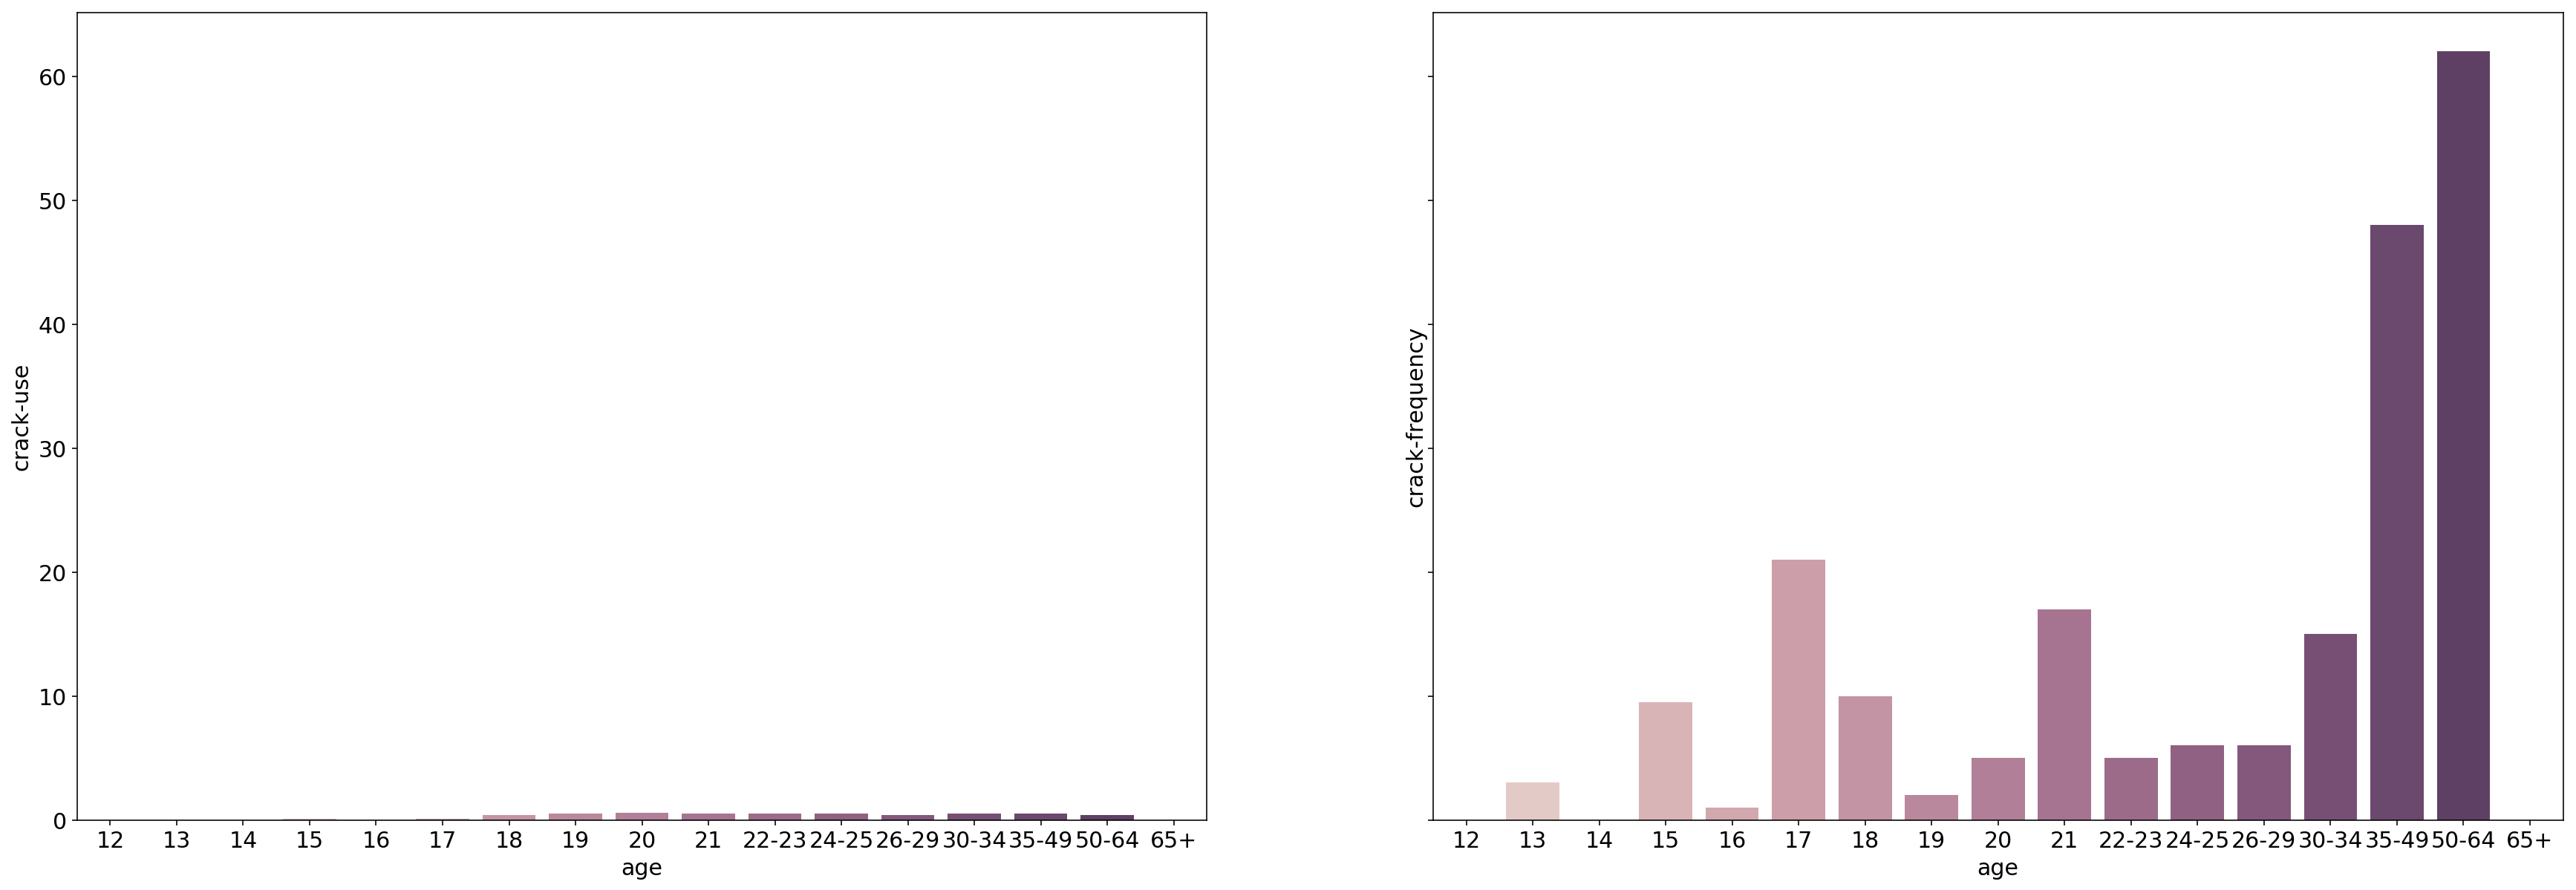

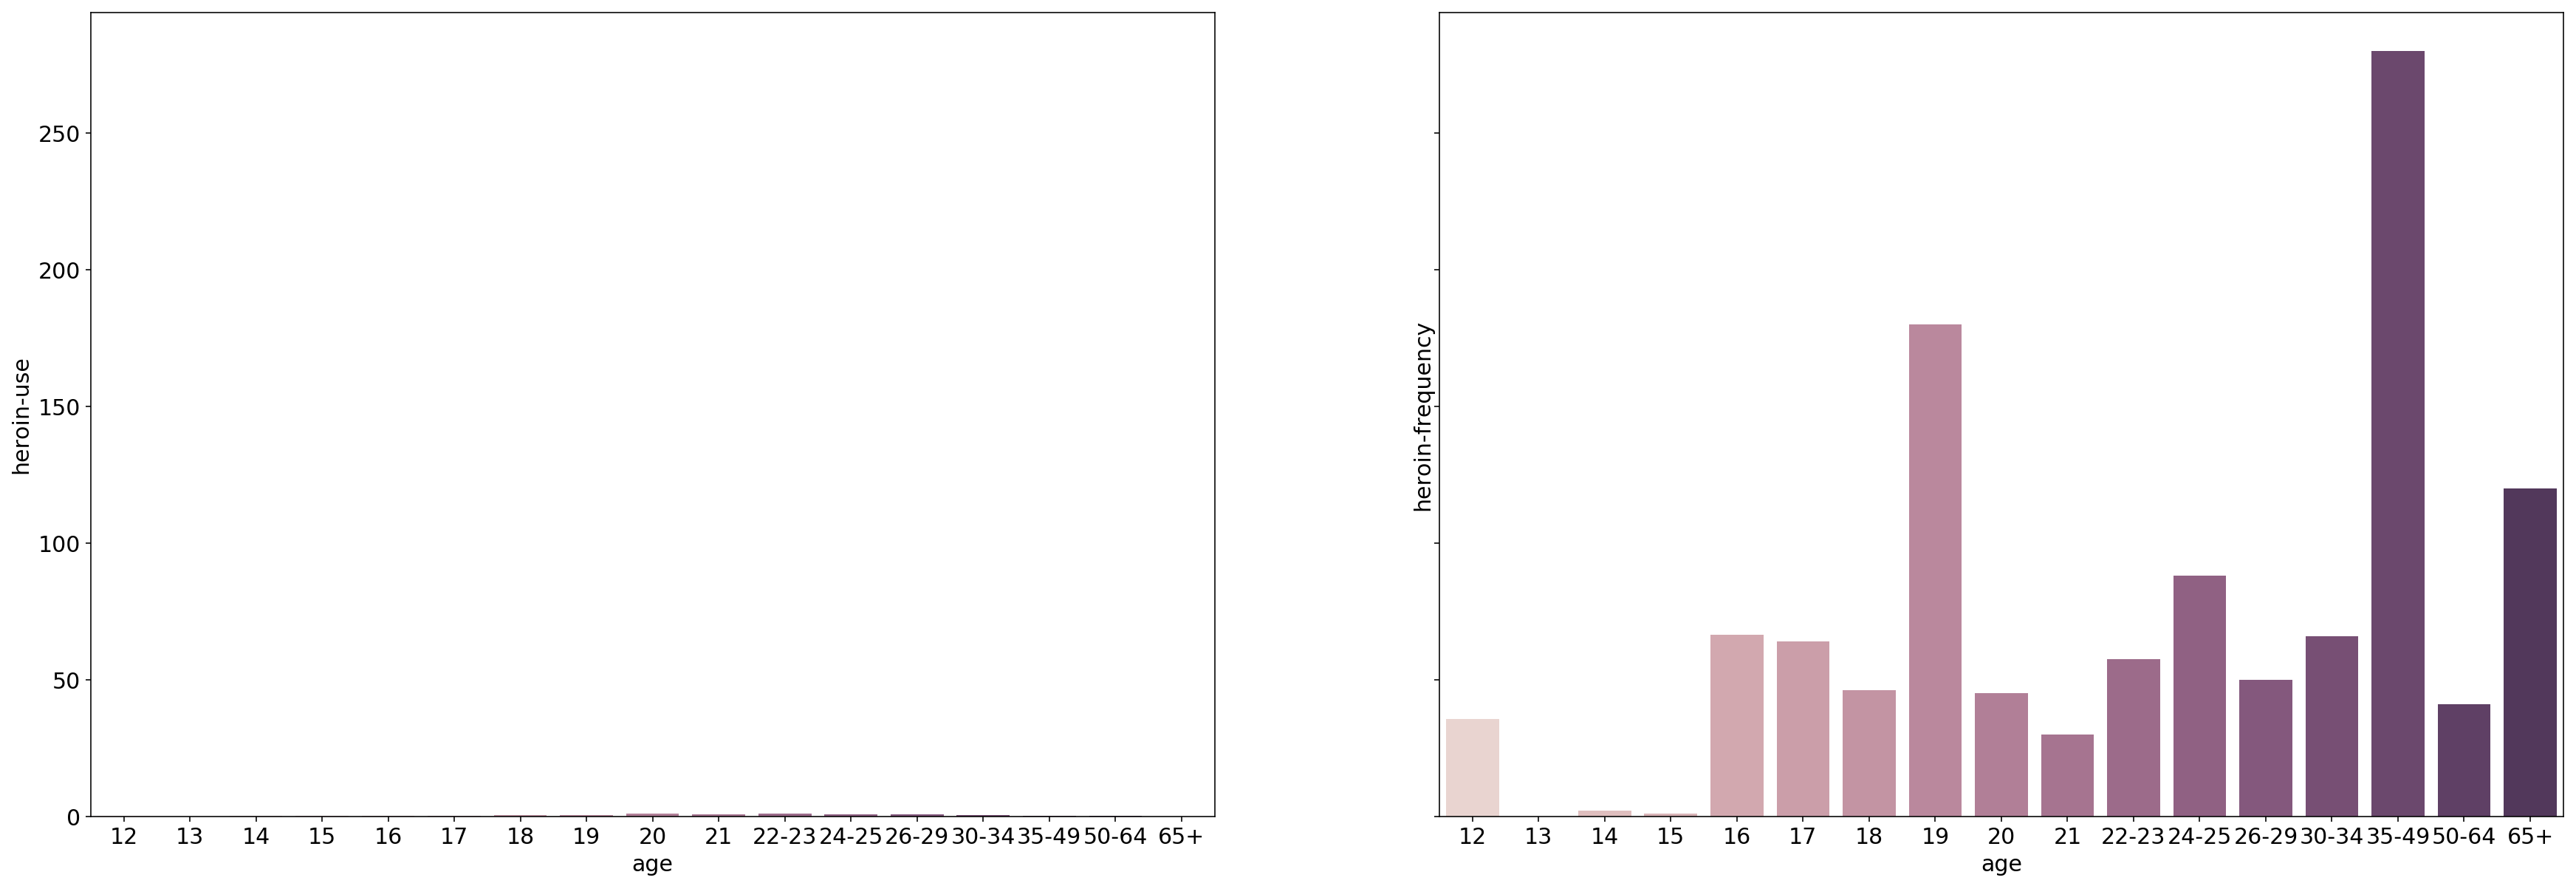

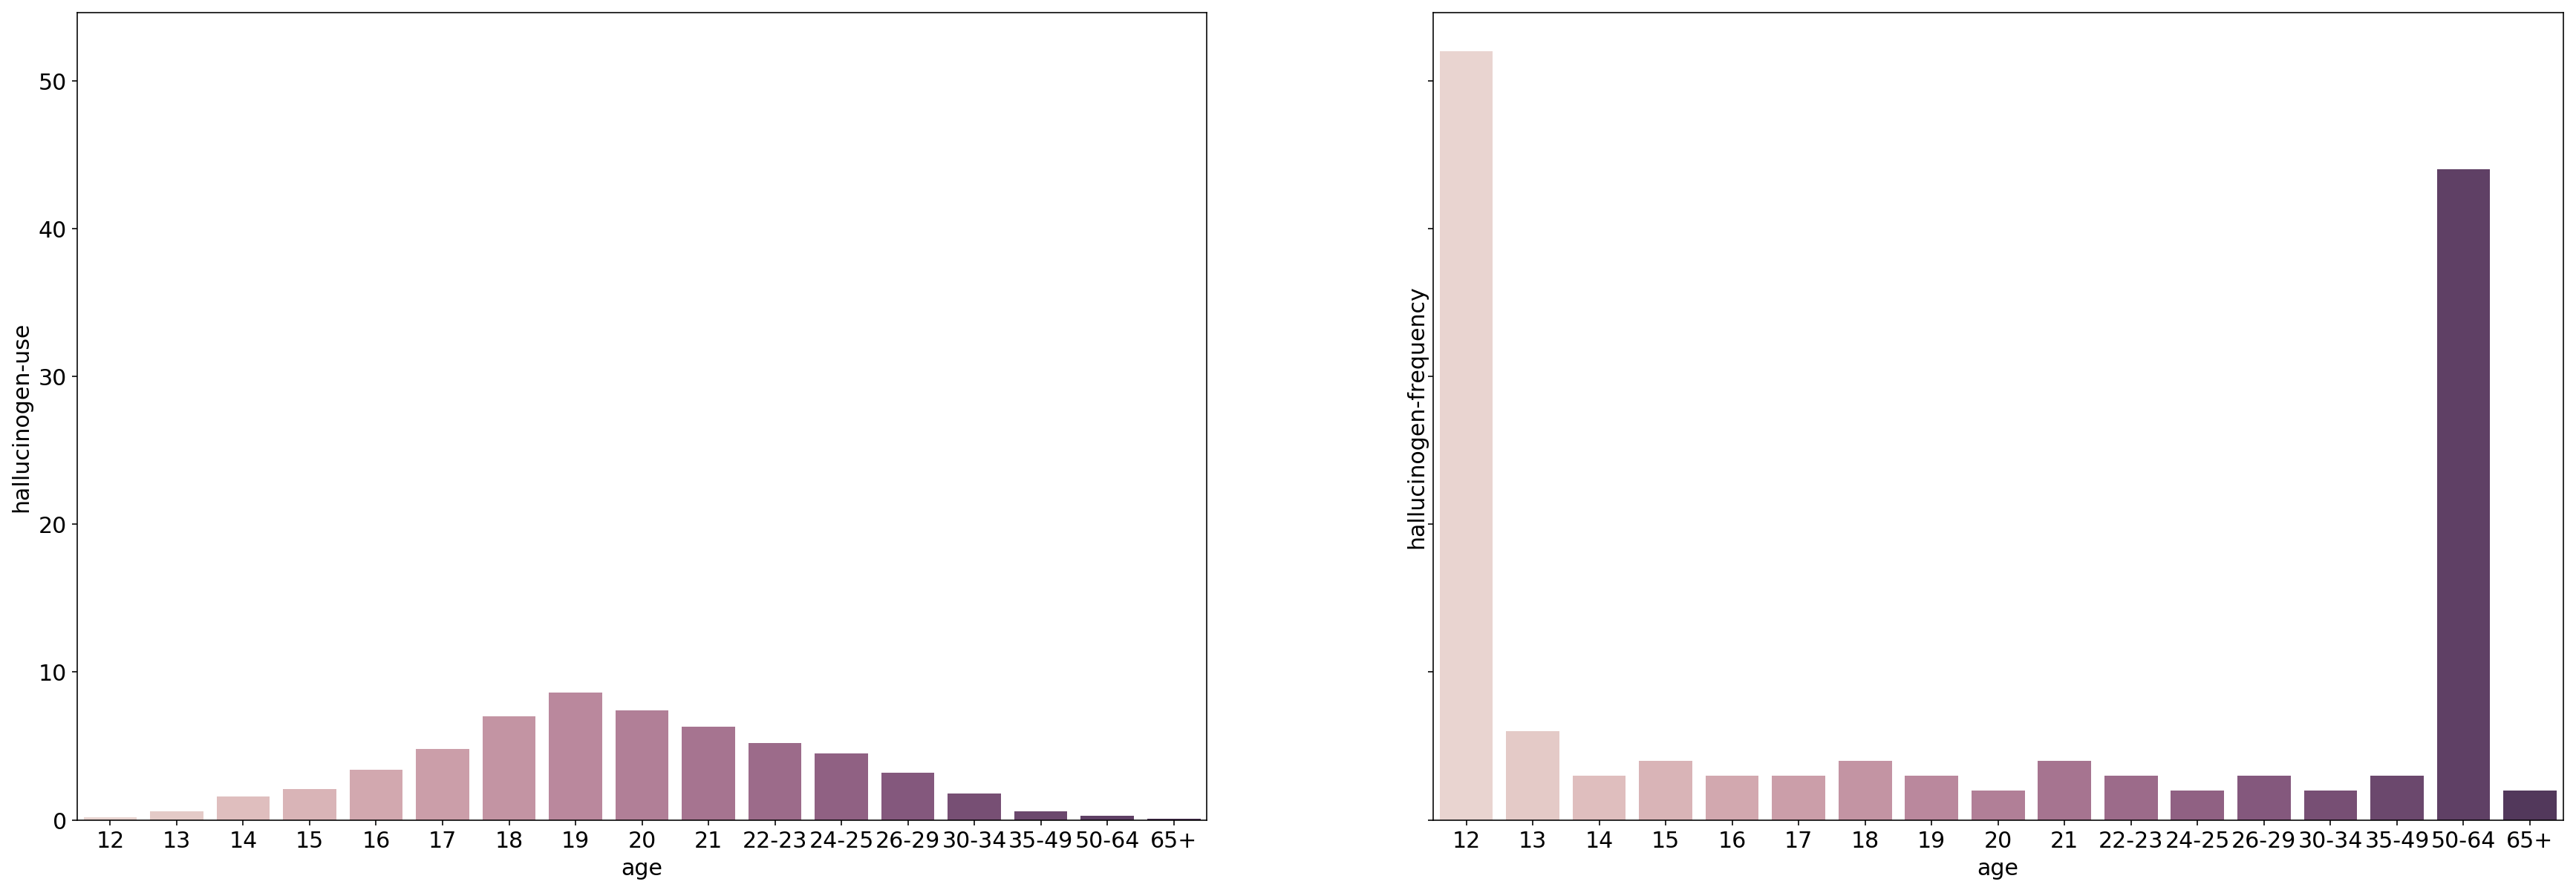

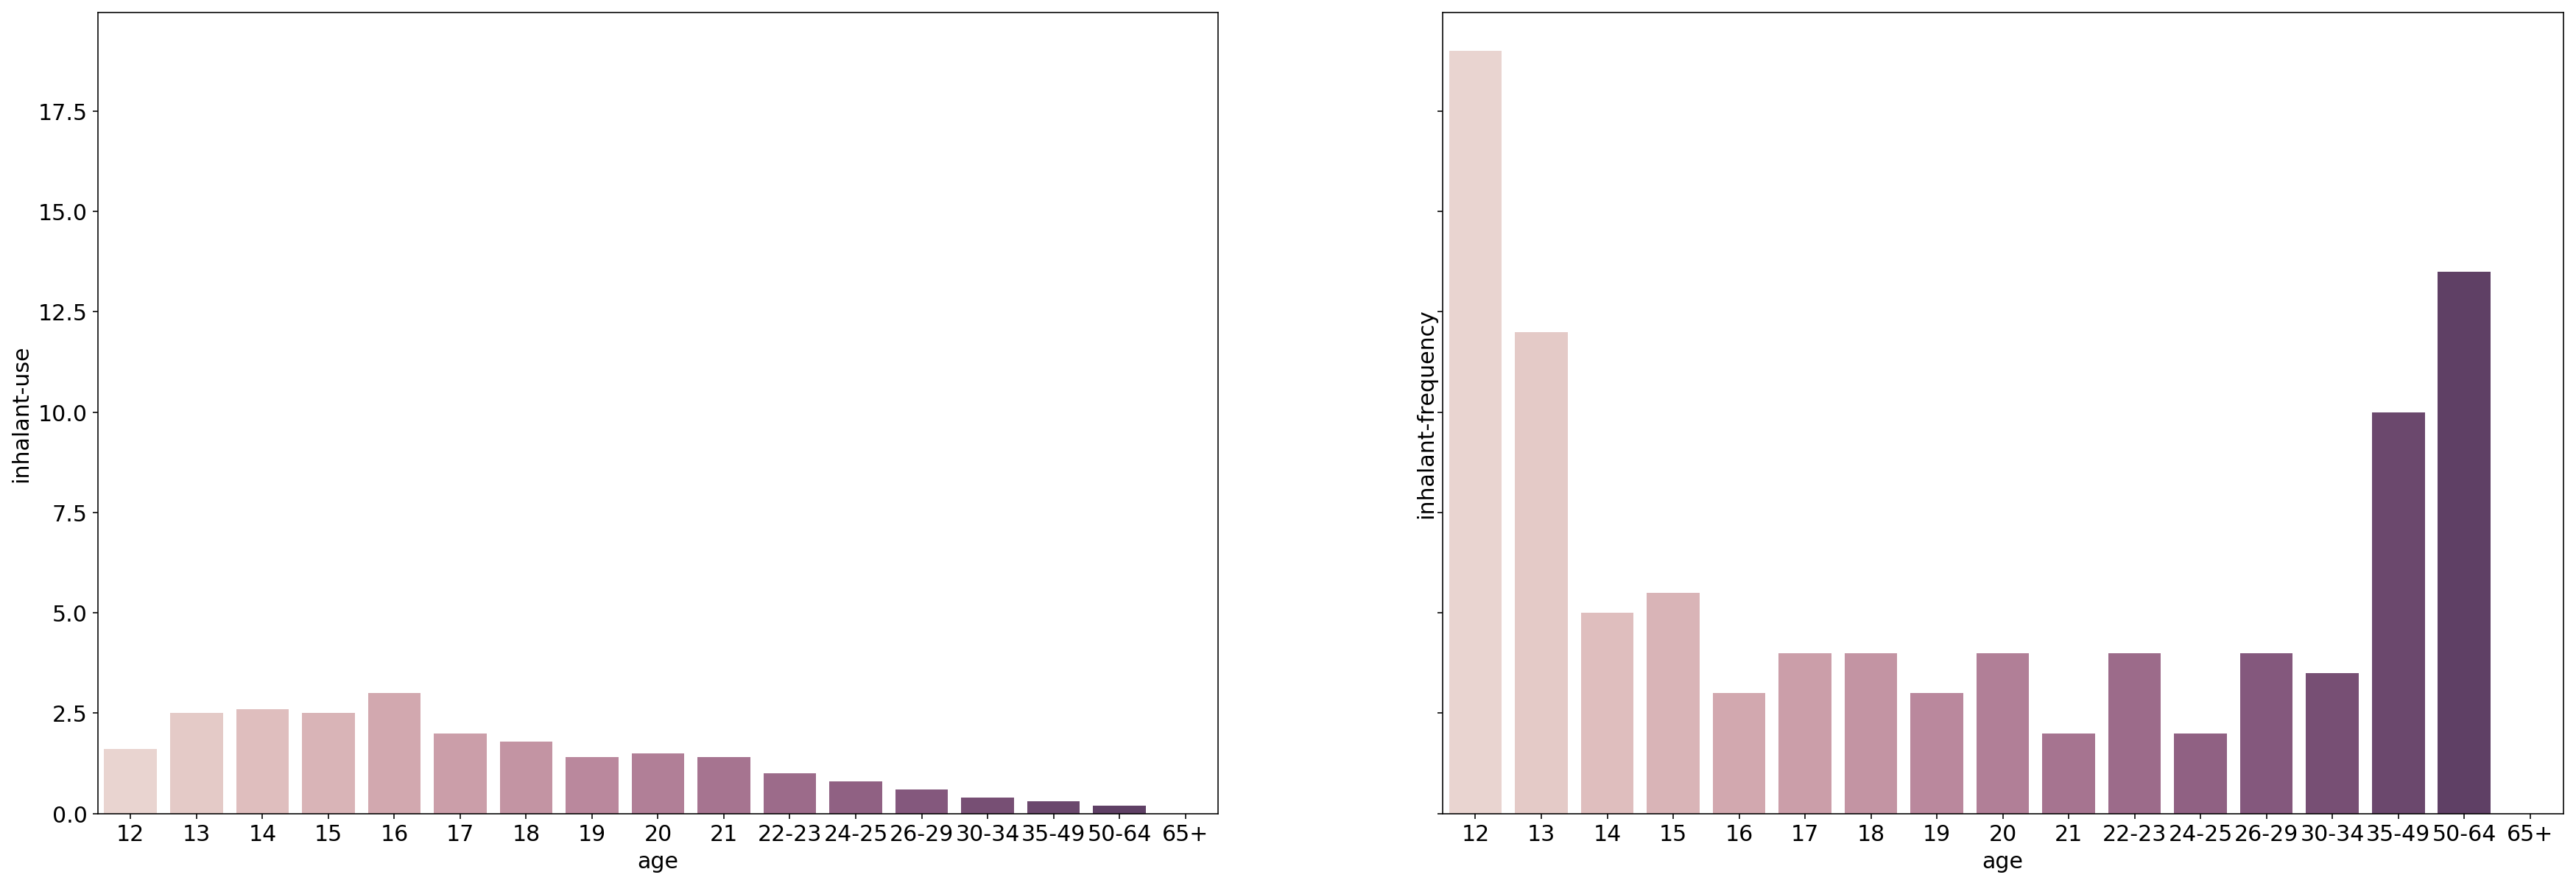

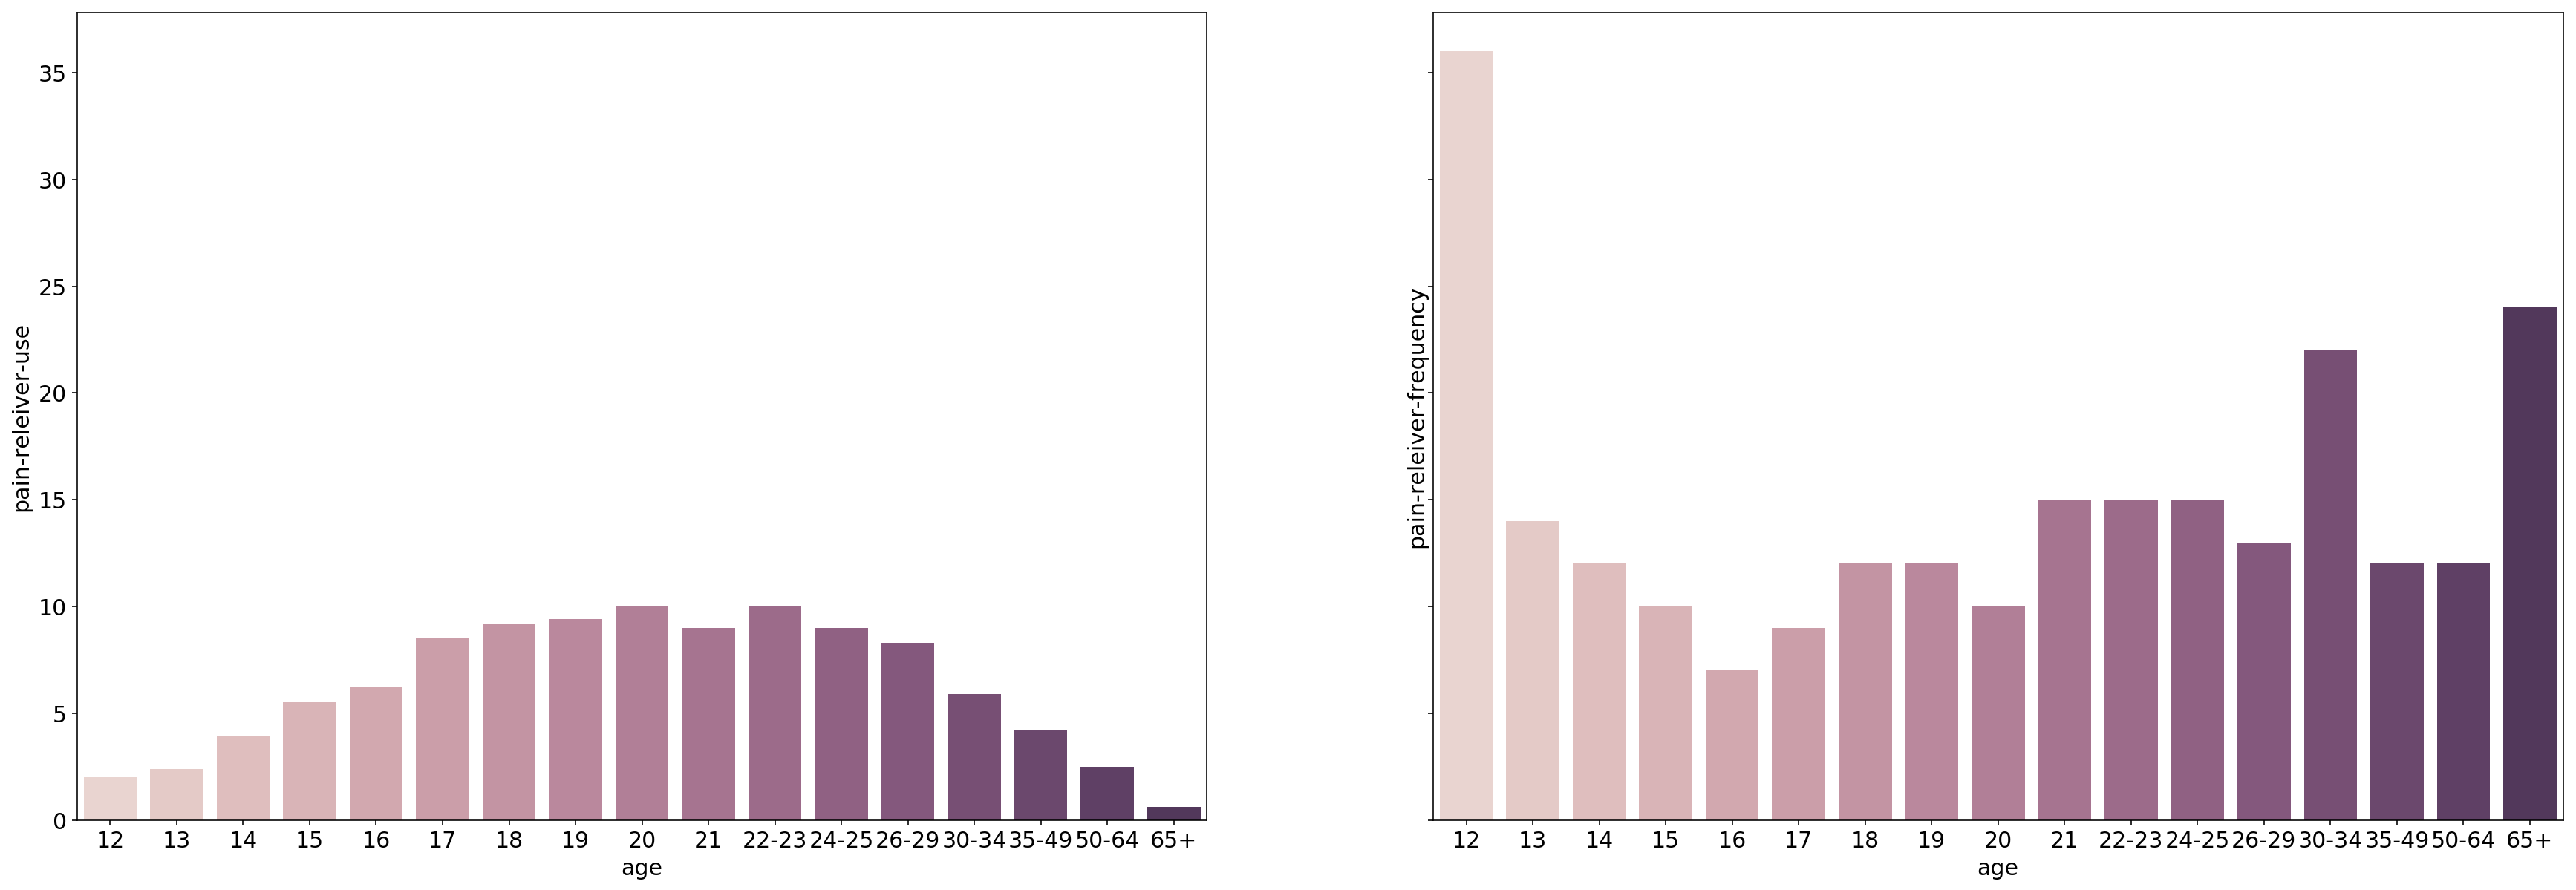

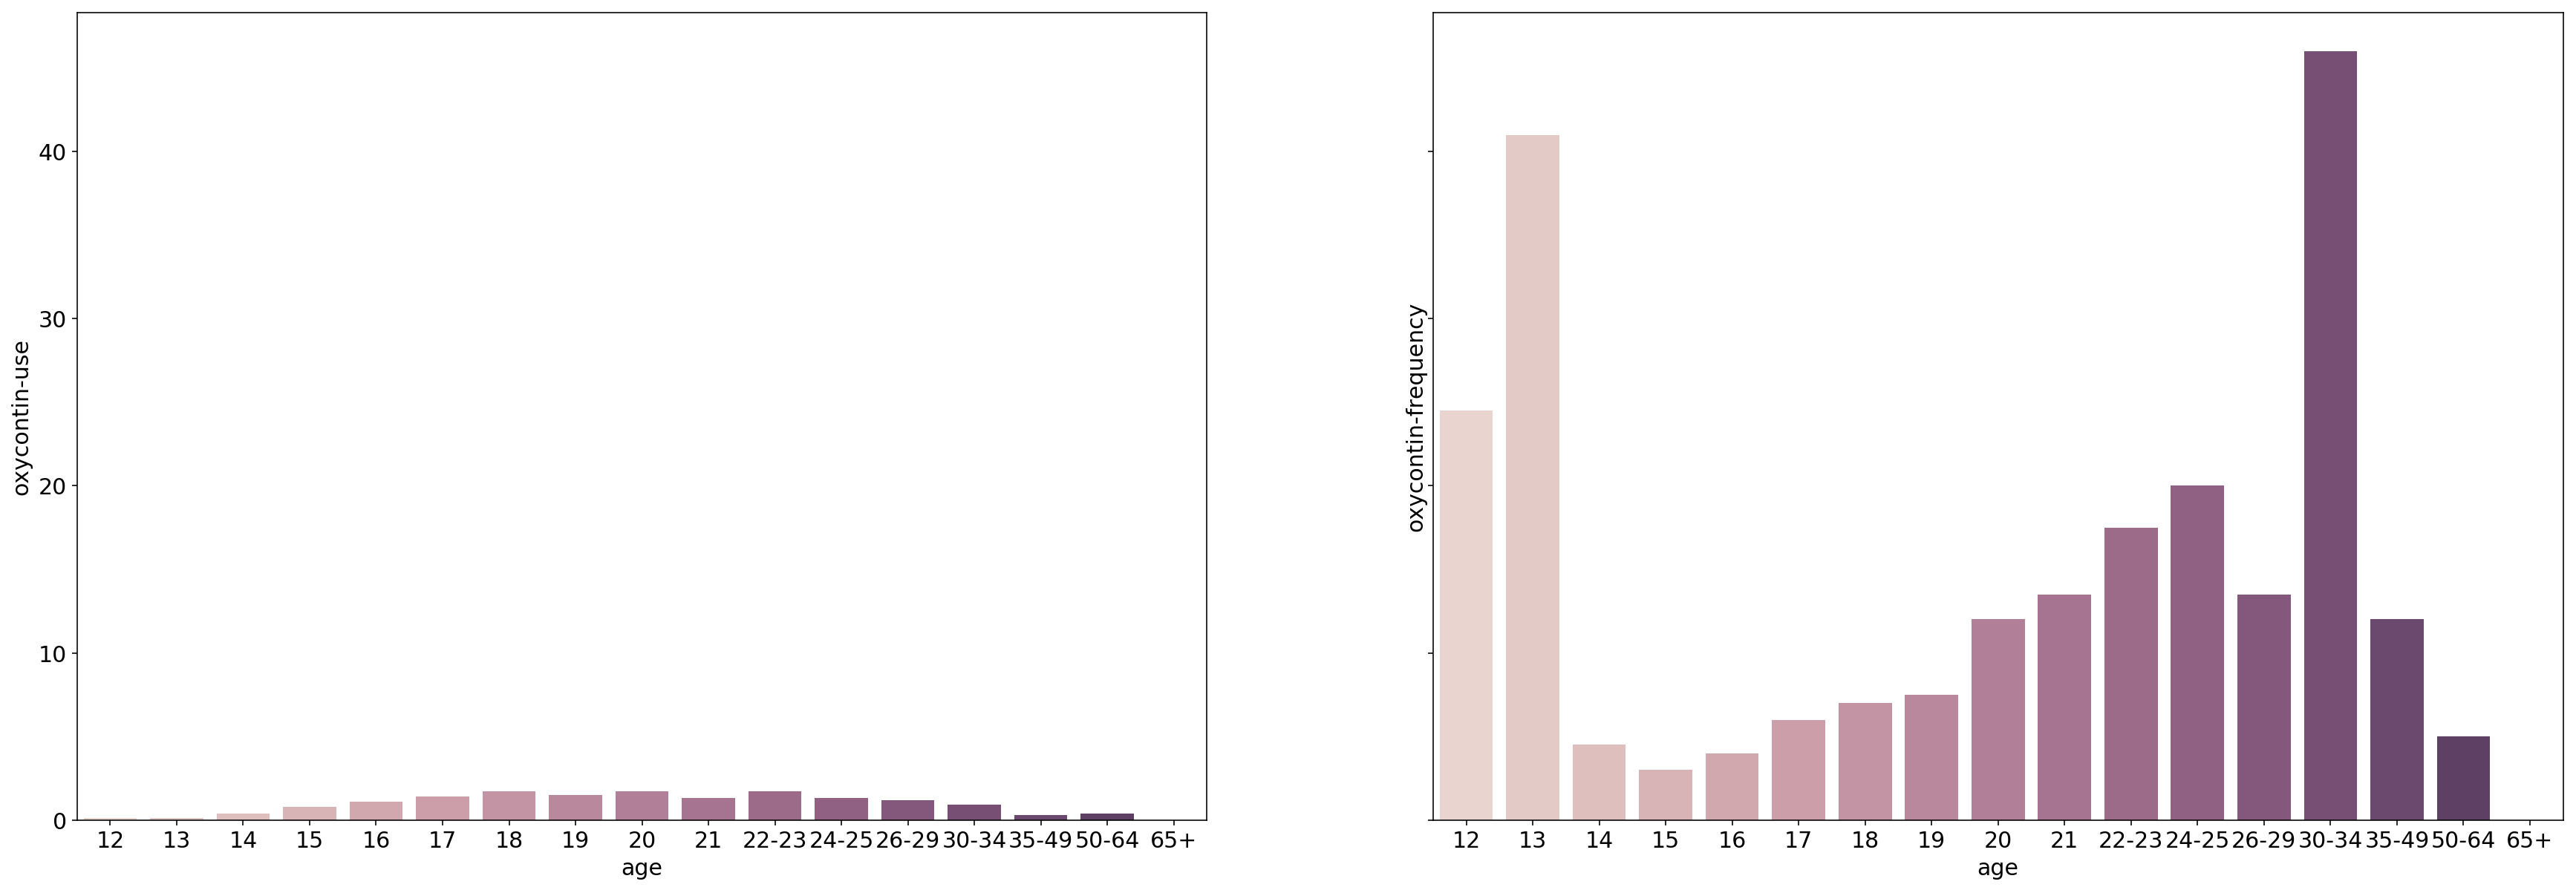

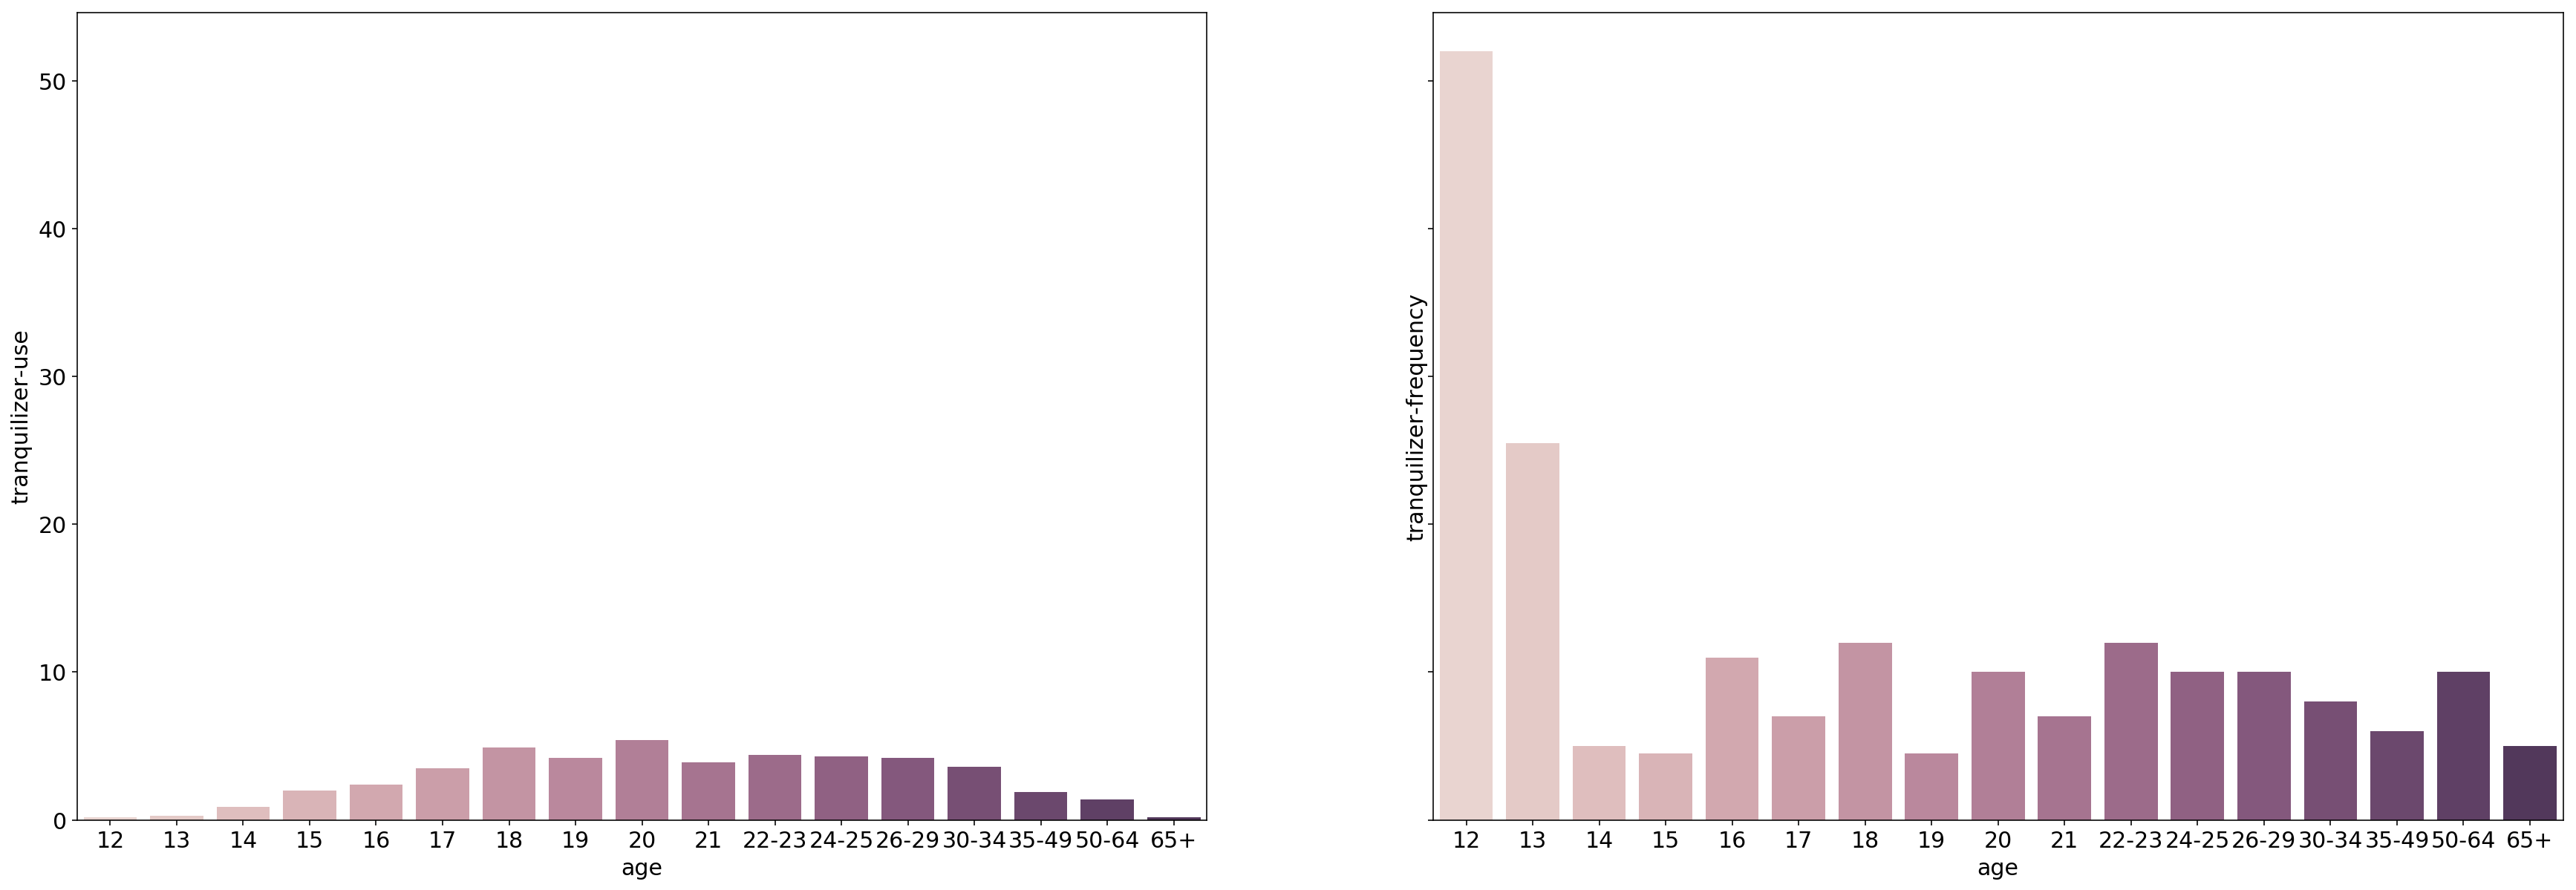

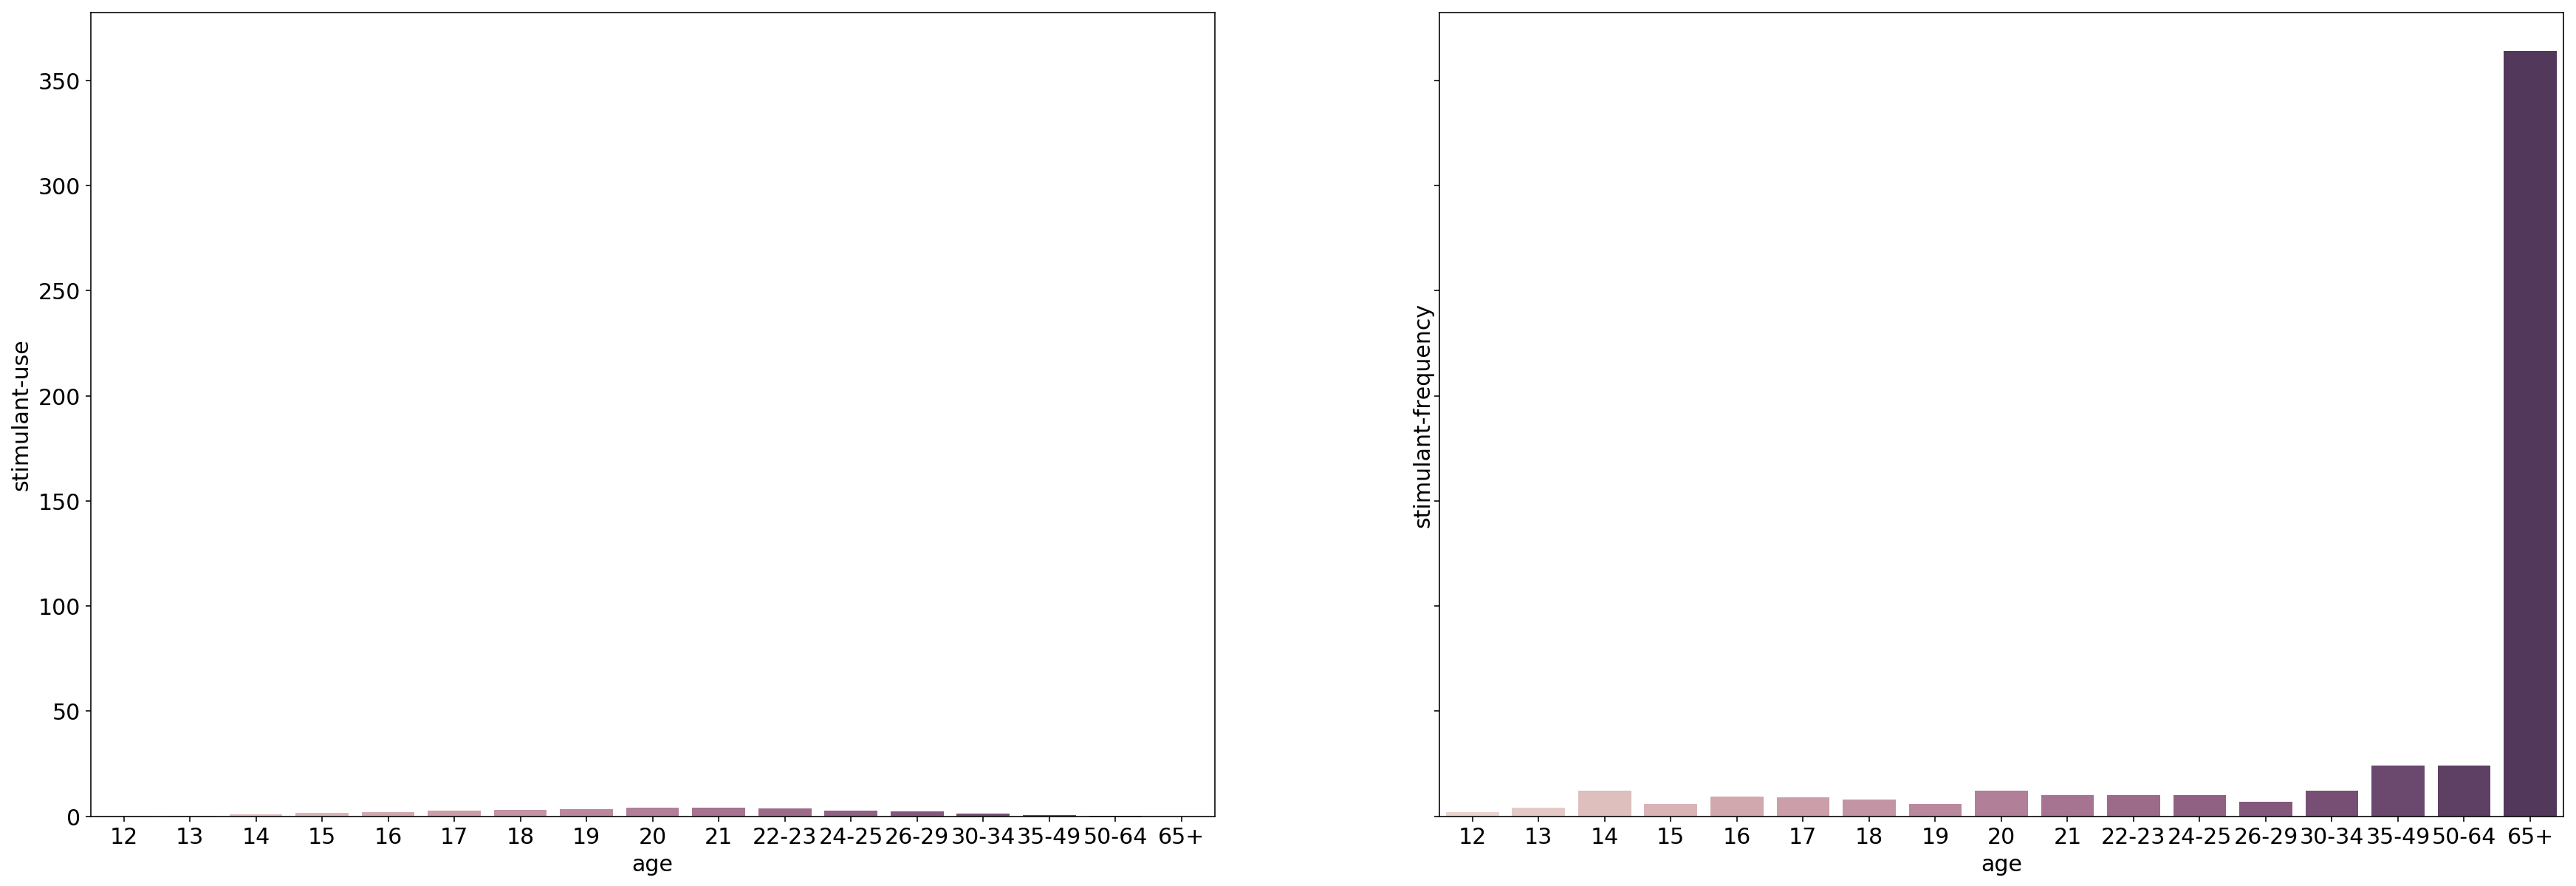

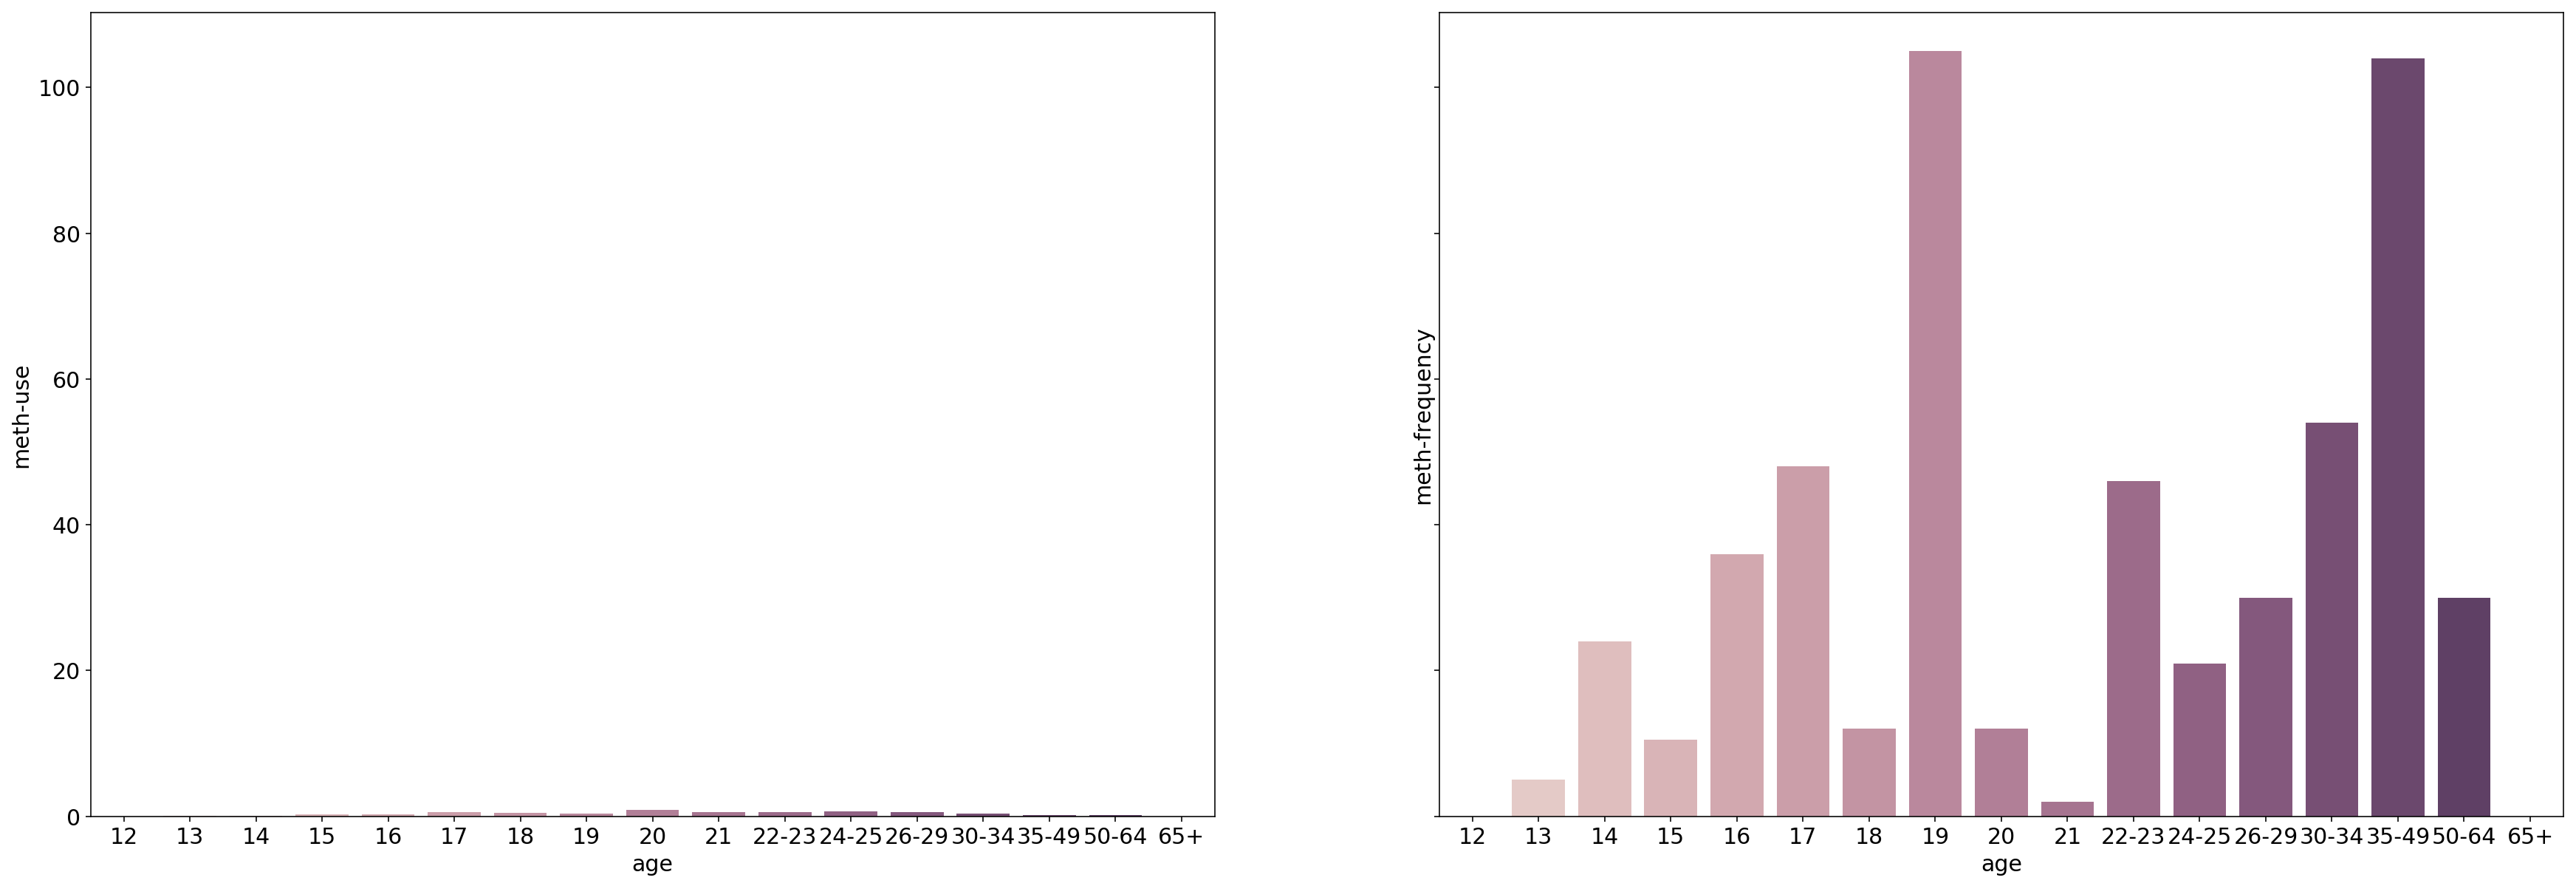

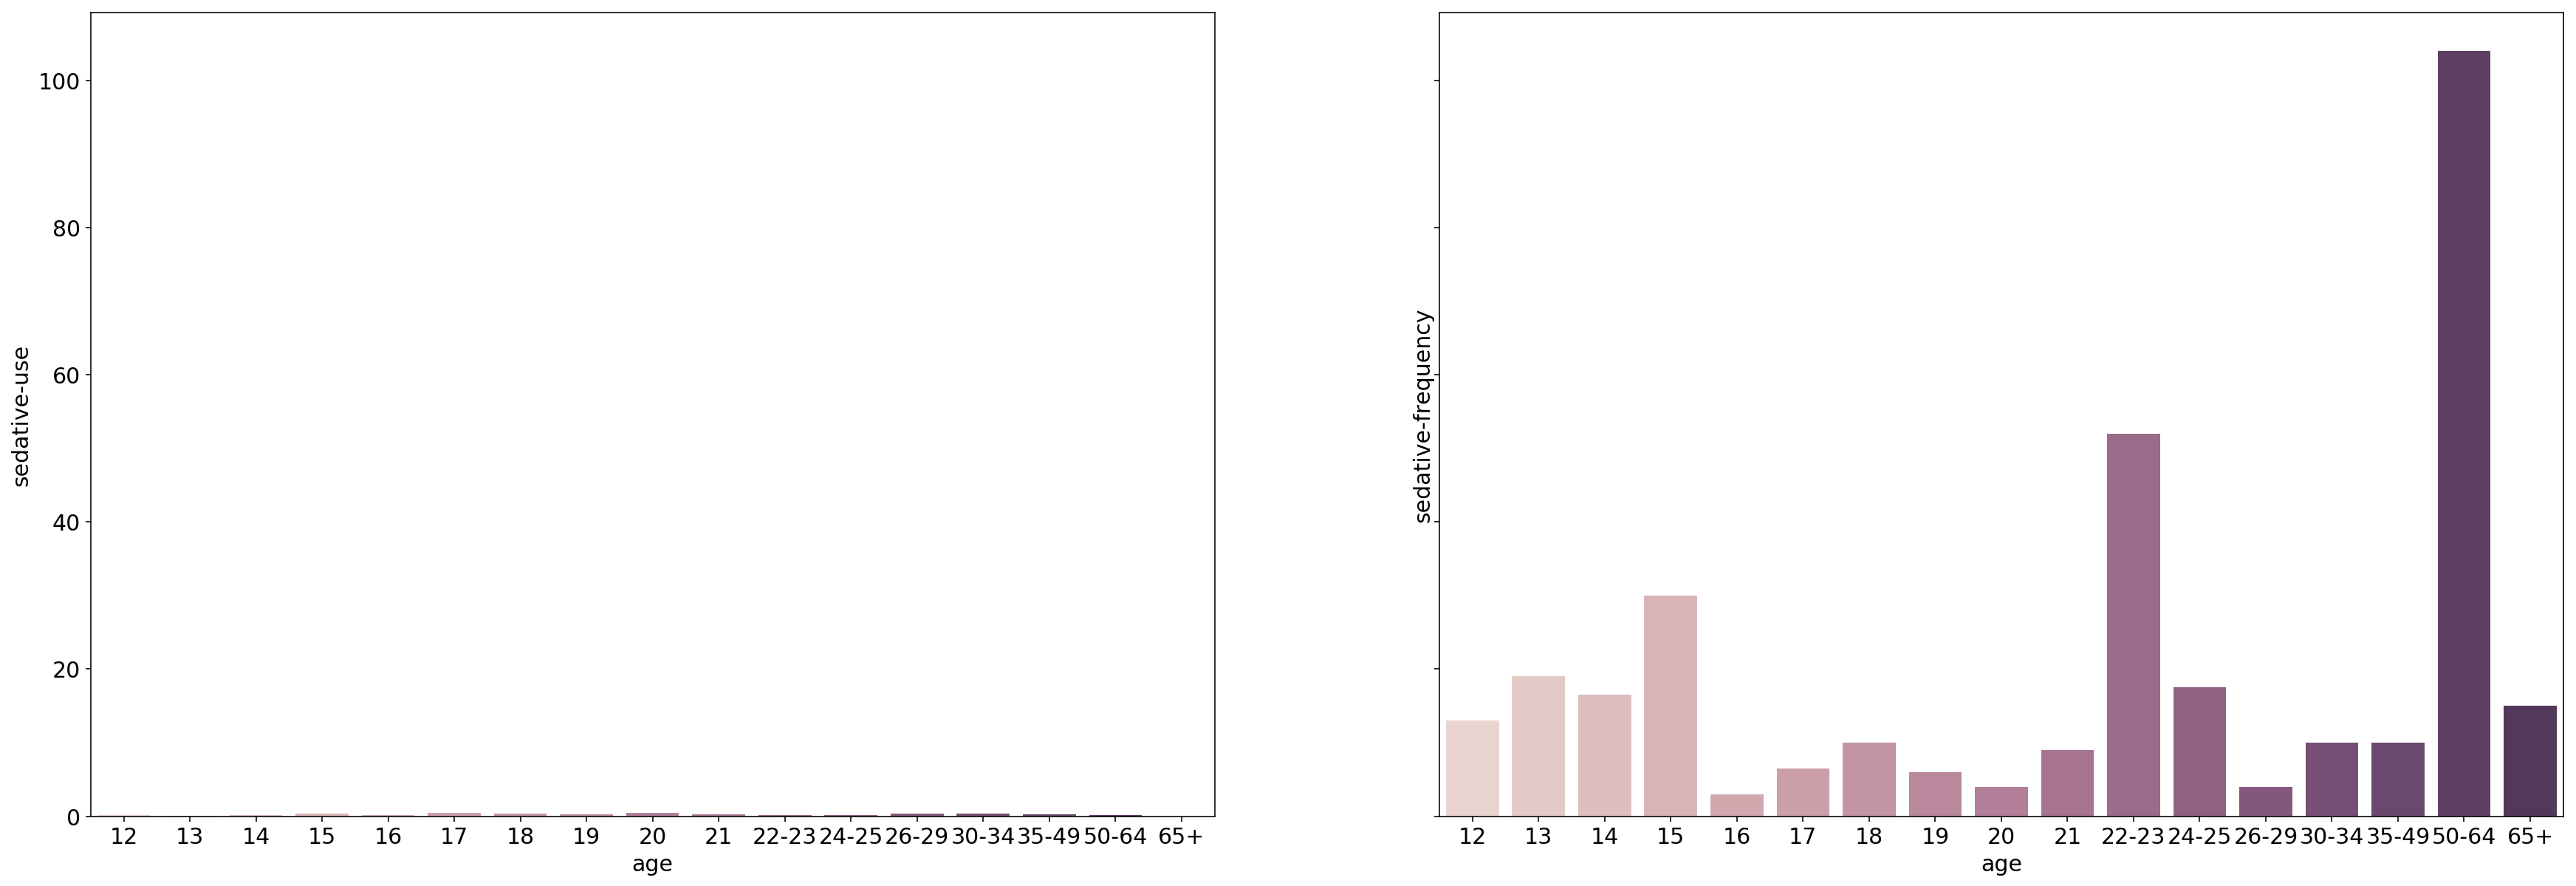

In [97]:
for seq in range(len(drug_use)):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(30, 10))
    sns.set_palette(sns.cubehelix_palette(20))
    sns.barplot(x='age', y=drug[drug_use[seq]],data=drug,ax=ax1)
    sns.barplot(x='age', y=drug[drug_freq[seq]], data=drug,ax=ax2)
    
# bar chart below shows that alcohol and marijuana are the most commonly abused substances.
# there is a steady rise of users and peaking at age 20 or 21.
# This may show that controling the access of such substances especially at late teen may have a significant impact
# in reducing its users

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [99]:
drug["alcohol-count"] = drug["alcohol-use"] * drug["n"]
drug["marijuana-count"] = drug["marijuana-use"] * drug["n"]

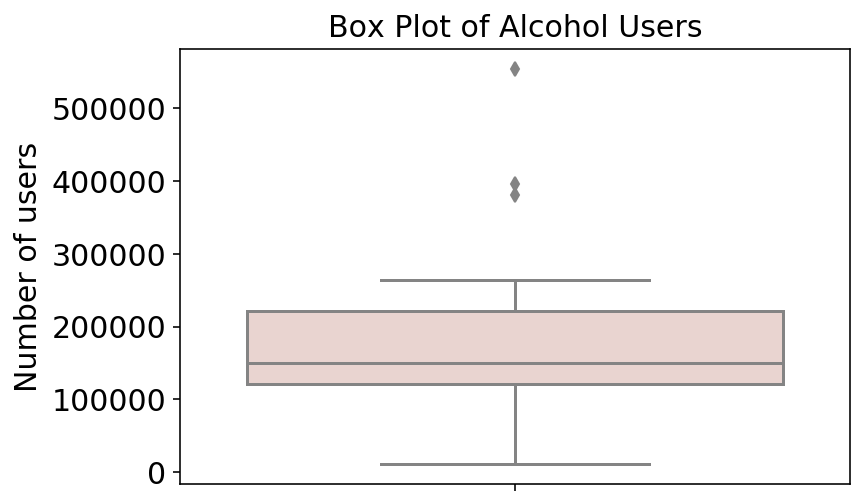

In [101]:
sns.boxplot("alcohol-count", data=drug, orient='v')
ax = plt.gca()
ax.set_title("Box Plot of Alcohol Users")
ax.set_ylabel("Number of users")
plt.show()

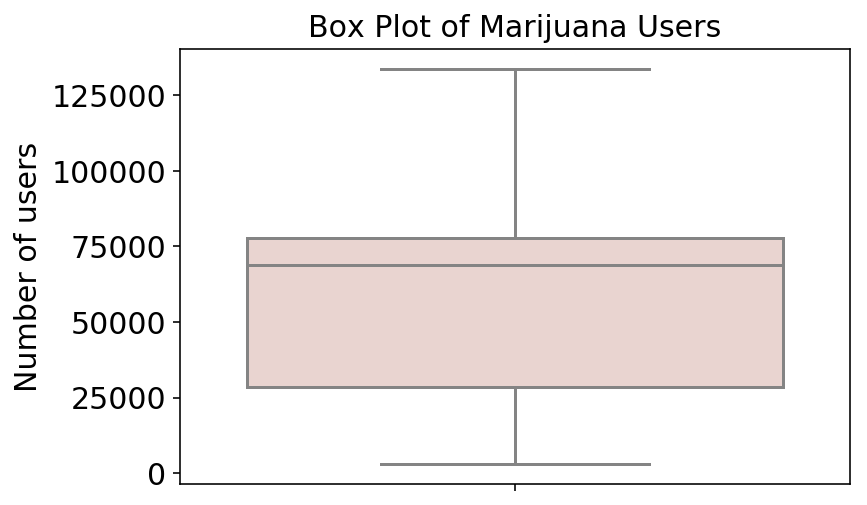

In [103]:
sns.boxplot("marijuana-count", data=drug, orient='v')
ax = plt.gca()
ax.set_title("Box Plot of Marijuana Users")
ax.set_ylabel("Number of users")
plt.show()

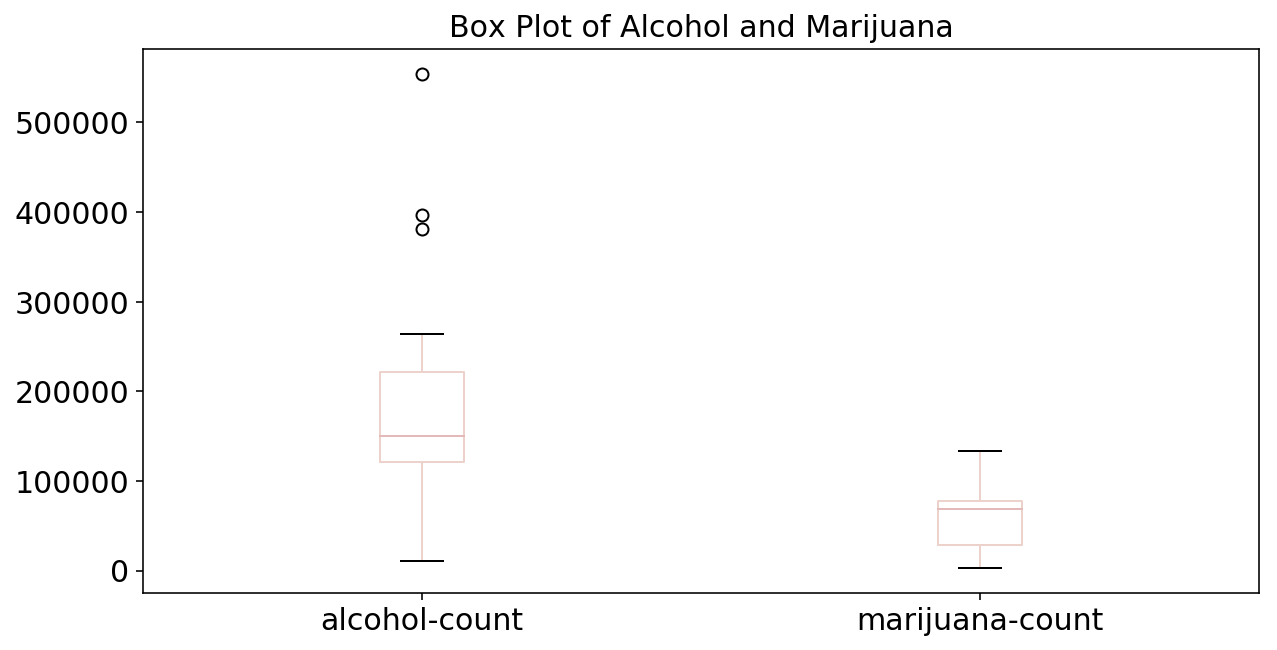

In [106]:
drug[['alcohol-count', 'marijuana-count']].plot.box(figsize=(10,5),fontsize=15,title='Box Plot of Alcohol and Marijuana')

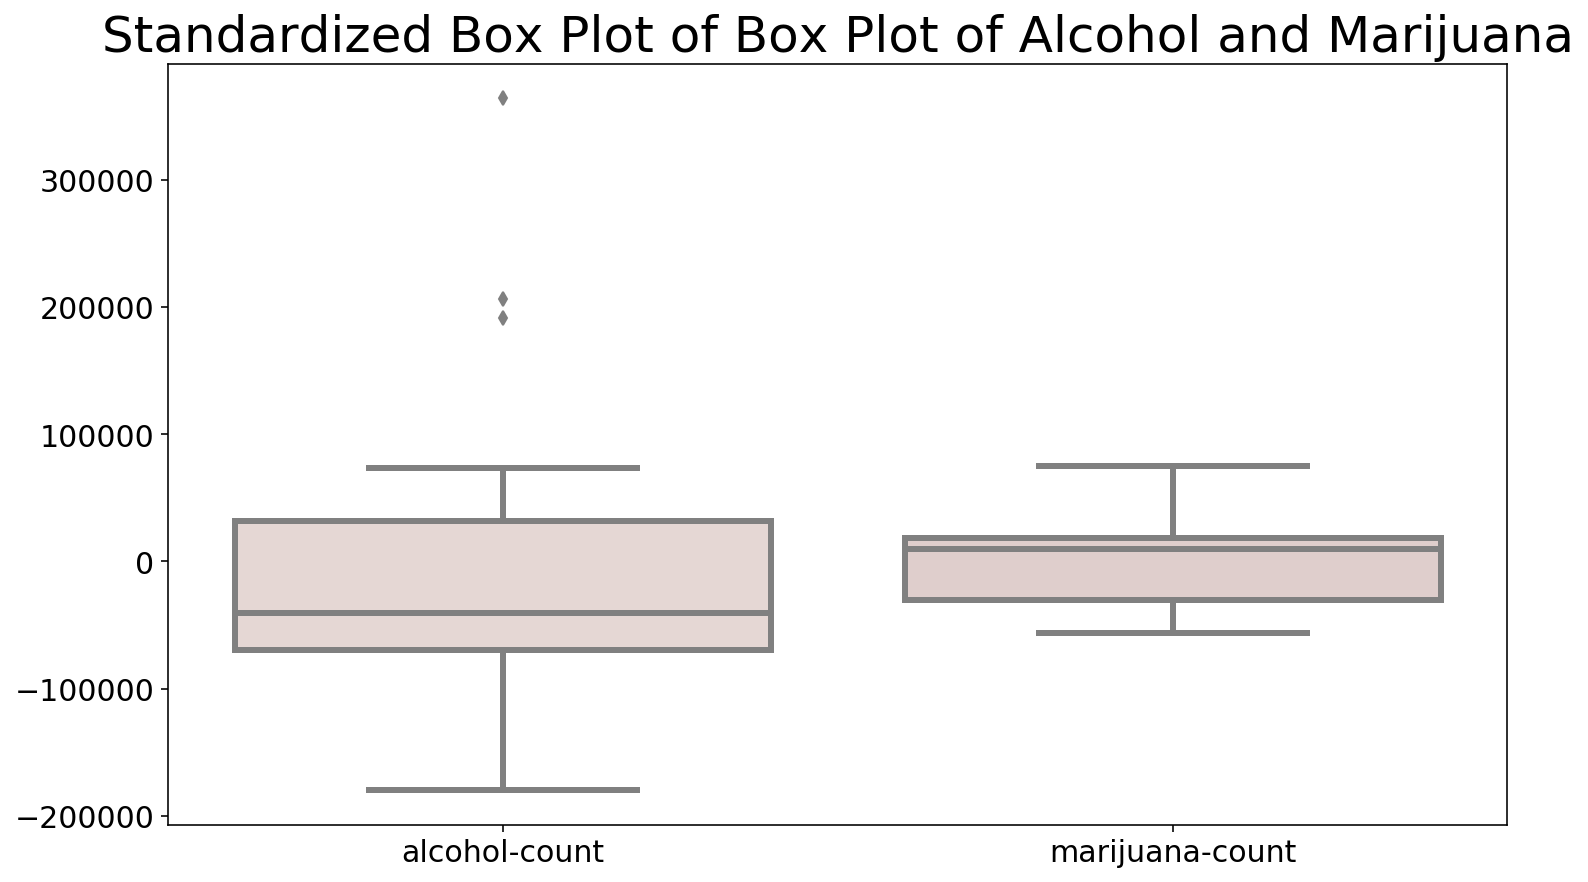

In [109]:
drug_standardized = (drug[['alcohol-count', 'marijuana-count']] - drug[['alcohol-count', 'marijuana-count']].mean())
/ drug[['alcohol-count','marijuana-count']].std()

fig = plt.figure(figsize=(12, 7))
ax = fig.gca()

ax = sns.boxplot(data=drug_standardized, orient='v', fliersize=5, 
                 linewidth=3, saturation=0.5, ax=ax)

ax.set_title('Standardized Box Plot of Box Plot of Alcohol and Marijuana',fontsize=25)

plt.show()

In [110]:
corr, p = stats.pearsonr(drug[["alcohol-count"]],drug[["marijuana-count"]])
print("Pearson Correlation: {:.4f}, p-value: {:.4f}".format(corr[0],p[0]))

Pearson Correlation: 0.6370, p-value: 0.0060


In [111]:
drug[["alcohol-count","marijuana-count"]].corr()

,alcohol-count,marijuana-count
alcohol-count,1.000000,0.637024
marijuana-count,0.637024,1.000000


H0: Alcohol usage and Marijuana usage are independent of one another.
H1: Alcohol usage and Marijuana usage are not independent of one another.


Despite initial indication of a strong correlation between alcohol and marijuana in the heatmap plot of frequency drug use that is based on median of user, and also both having a largest number of users of all the substances studied, the further investigation shows a much weaker correlation both substance users than initially indicated when it is based on the total number of studied users.

The correlation between the number of people using Alcohol and Marijuana is 0.6370 and the p-value is only 0.0060, therefore it is unable to reject the null hypothesis (H0). As such, alcohol users and Marijuana users are highly likely to be independent of one another, although both numbers do show a mid positive correlation.

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.